In [1]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import pickle
import PIL as pillow
from tqdm import tqdm
import numpy as np
import seaborn as sns
import scipy.stats as spst
import scipy
from statannotations.Annotator import Annotator
import time
from pathlib import Path
import argparse
from matplotlib.gridspec import GridSpec
from matplotlib.transforms import Affine2D
import baisic_plot_fuctnions_and_features as bpf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
bpf.set_plot_properties()

vlinec = "#C35817"

learner_cell = "2022_12_21_cell_1" 
non_learner_cell = "2023_01_10_cell_1"
time_to_plot = 0.250 # in s 

time_points = ["pre","0", "10", "20","30" ]
selected_time_points = ['post_0', 'post_1', 'post_2', 'post_3','pre']
                        #'post_4','post_5']
cell_dist=[8,10,4]
cell_dist_key = ["leaners","non\nlearners","cells\nnot\ncosidered"]

In [388]:
all_cells_all_trails_extracted_featrues = pd.read_pickle("/Users/anzalks/Documents/pattern_learning_paper/plotting_scripts/python_scripts_paper_ready/analysis_scripts/pickle_files_from_analysis/pd_all_cells_all_trials.pickle")

In [475]:
def substract_baseline(trace,sampling_rate, bl_period_in_ms):
    bl_period = bl_period_in_ms/1000
    bl_duration = int(sampling_rate*bl_period)
    bl = np.mean(trace[:bl_duration])
    bl_trace = trace-bl
    return bl_trace

In [466]:
all_cells_all_trails_extracted_featrues.head()#["frame_status"].unique()

,cell_ID,frame_status,pre_post_status,frame_id,trial_no,min_trace,max_trace,abs_area,pos_area,neg_area,...,max_field_t,min_field_t,trace,field,ttl,mean_rmp,mepsp_amp,mepsp_time,num_mepsp,freq_mepsp
0,2022_12_12_cell_5,pattern,post_0,pattern_0,0,-1.442230,12.818634,237031840.0,158334032.0,78697808.0,...,0.013151,0.00255,"[-0.004852295, 0.0073547363, -0.007904053, -0....","[0.040245056, 0.058555603, 0.07396698, 0.08419...","[0.018310547, 0.018615723, 0.016479492, 1.5722...",-63.685665,0.802338,"[727.559094488681, 937.4617182714784, 1043.413...",6,1.50
0,2022_12_12_cell_5,pattern,post_0,pattern_0,1,-1.769188,15.180275,290316480.0,199386208.0,90930264.0,...,0.022652,0.00215,"[0.01914215, -0.011375427, -0.026634216, -0.02...","[0.064323425, 0.049827576, 0.043876648, 0.0455...","[0.018310547, 0.018615723, 0.016479492, 1.5722...",-63.685665,0.928566,"[350.55438192977414, 2252.178152226903, 3650.8...",3,0.75
0,2022_12_12_cell_5,pattern,post_0,pattern_0,2,-1.707489,16.053741,265094320.0,189985072.0,75109248.0,...,0.010901,0.00230,"[-0.0046081543, -0.0046081543, -0.007659912, 0...","[0.06317139, 0.055847168, 0.03768921, 0.022735...","[0.018310547, 0.018615723, 0.016479492, 1.5722...",-63.685665,1.346303,"[807.8100976262203, 2031.5753946924335, 2287.3...",3,0.75
0,2022_12_12_cell_5,pattern,post_0,pattern_1,0,-1.494659,13.193451,238644880.0,161582928.0,77061928.0,...,0.017502,0.00185,"[-0.023712158, -0.0206604, -0.023712158, -0.02...","[0.09341431, 0.09448242, 0.08425903, 0.0825805...","[0.018005371, 0.017089844, 0.018615723, 1.5701...",-63.685665,1.039171,"[215.85269815872698, 566.707083838548, 710.508...",7,1.75
0,2022_12_12_cell_5,pattern,post_0,pattern_1,1,-1.511871,12.623871,232197312.0,164338464.0,67858832.0,...,0.013301,0.00190,"[-0.06838989, -0.053131104, -0.047027588, -0.0...","[0.06252289, 0.048179626, 0.035362244, 0.05672...","[0.018005371, 0.017089844, 0.018615723, 1.5701...",-63.685665,NaN,[],0,0.00


In [165]:
pre_post_grp = all_cells_all_trails_extracted_featrues.groupby(by="pre_post_status")
mepsp_pre=[]
mepsp_post=[]
for pps,pps_data in pre_post_grp:
    if pps=="pre":
        mepsp_pre.append(pps_data)
    elif pps=="post_3":
        mepsp_post.append(pps_data)
    else:
        pass

In [167]:
mepsp_pre = pd.concat(mepsp_pre)
mepsp_post = pd.concat(mepsp_post)

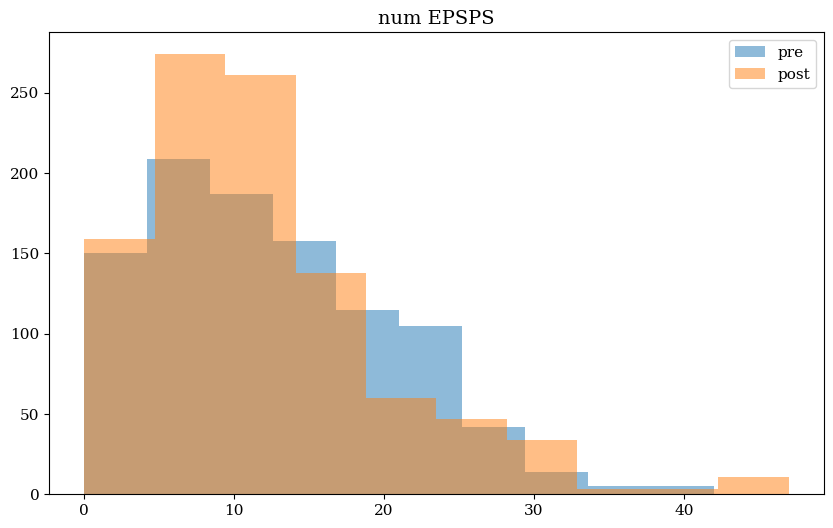

In [389]:
mepsp_pre["num_mepsp"].hist(grid=False,alpha=0.5, label="pre")
mepsp_post["num_mepsp"].hist(grid=False,alpha=0.5, label="post")
plt.title("num EPSPS")
plt.legend()

Text(0.5, 1.0, 'freq EPSPS')

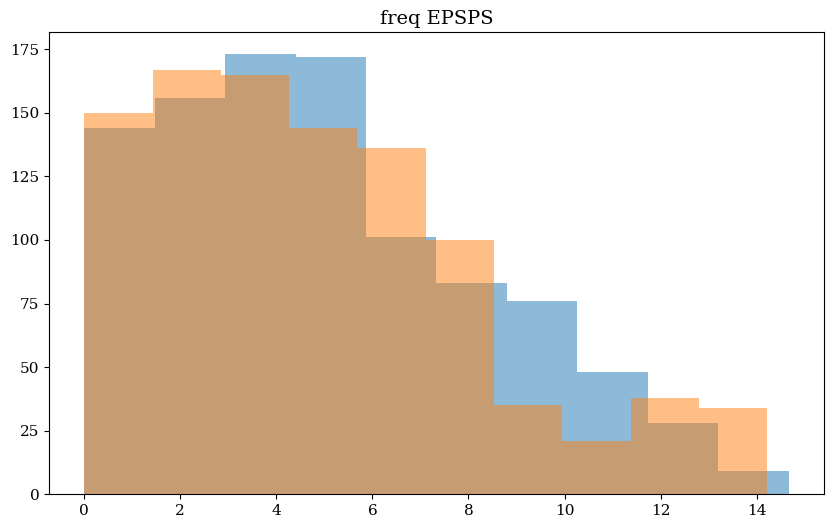

In [387]:
mepsp_pre["freq_mepsp"].hist(grid=False,alpha=0.5, label="pre")
mepsp_post["freq_mepsp"].hist(grid=False,alpha=0.5, label="pre")
plt.title("freq EPSPS")

<Axes: xlabel='pre_post_status', ylabel='freq_mepsp'>

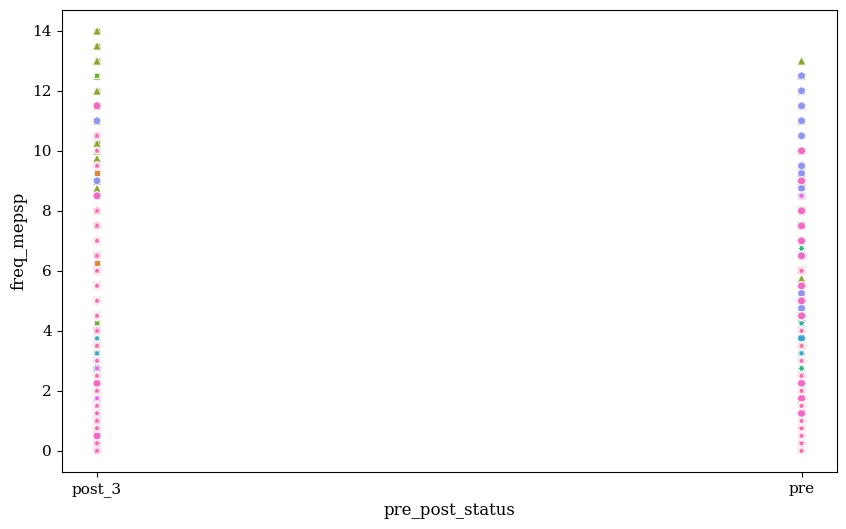

In [390]:
pre_post_dat = all_cells_all_trails_extracted_featrues[all_cells_all_trails_extracted_featrues["pre_post_status"].isin(["pre","post_3"])].reset_index(drop=True)
sns.scatterplot(data=pre_post_dat, x="pre_post_status", y="freq_mepsp", hue="cell_ID",legend=False,style="cell_ID")

(-0.1256011962890625, 5.0)

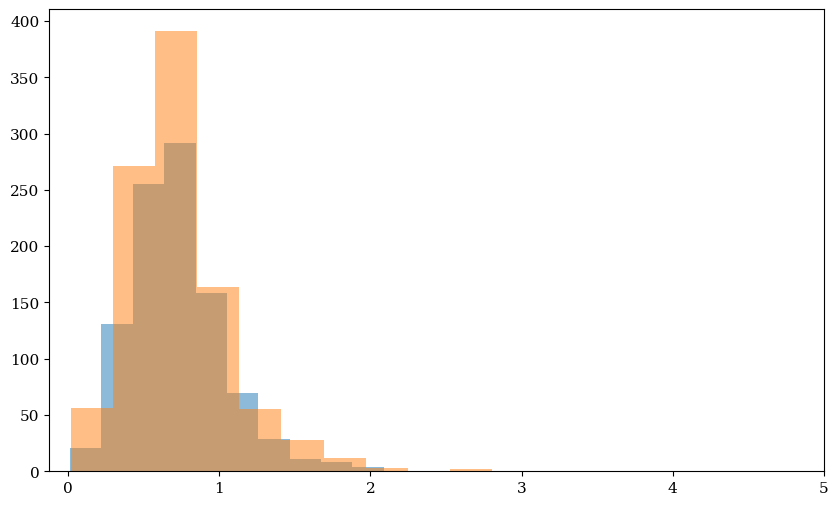

In [392]:
pre_post_dat[pre_post_dat["pre_post_status"]=="pre"]["mepsp_amp"].hist(grid=False,alpha=0.5)
pre_post_dat[pre_post_dat["pre_post_status"]=="post_3"]["mepsp_amp"].hist(grid=False, alpha=0.5)
plt.xlim(None,5)

In [142]:
learners = cell_dict_classified["ap_cells"]["cell_ID"].unique()
non_learners = cell_dict_classified["an_cells"]["cell_ID"].unique()

NameError: name 'cell_dict_classified' is not defined

In [ ]:
2023_01_27_cell_2

In [458]:

def mepsp_distribution_plot(all_cell_df,field_to_plot, learners,non_learners):
    all_cell_df = all_cell_df[all_cell_df["pre_post_status"].isin(["pre","post_3"])]
    cell_grps=all_cell_df.groupby(by="cell_ID")
    for cell,cell_data in cell_grps:
        fig,axs=plt.subplots(3,1)
        if cell in learners:
            cell_type ="learner"
        elif cell in non_learners:
            cell_type ="non-learner"
        else:
            color="k"
            continue
            
        pps_grp = cell_data.groupby(by="pre_post_status")
        for pps, pps_data in pps_grp:
            if pps=="pre":
                color='r'
            elif pps=="post_3":
                color='b'
            else:
                continue
            pps_data= pps_data.reset_index(drop=True)
            sns.histplot(pps_data[field_to_plot], bins=20, kde=True, color=color, edgecolor='black', ax=axs[0],alpha=0.6, label=pps)
            sns.histplot(data= pps_data, x="mepsp_amp", bins=10, kde=True, color=color, edgecolor='black', ax=axs[1],alpha=0.6, label=pps)
            sns.histplot(data= pps_data, x="num_mepsp", bins=10, kde=True, color=color, edgecolor='black', ax=axs[2],alpha=0.6, label=pps)
        axs[0].set_title(f"{field_to_plot}:{cell_type}:{cell}")
        axs[1].set_title(f"mepsp amplitude:{cell_type}:{cell}")
        axs[2].set_title(f"mepsp number:{cell_type}:{cell}")
        axs[0].set_xlim(0,15)
        axs[1].set_xlim(0,3)
        axs[2].set_xlim(0,40)
        plt.legend()
        plt.tight_layout()
        plt.show()
        plt.close()
    

In [459]:
all_cells_all_trails_extracted_featrues.columns

Index(['cell_ID', 'frame_status', 'pre_post_status', 'frame_id', 'trial_no',
       'min_trace', 'max_trace', 'abs_area', 'pos_area', 'neg_area',
       'onset_time', 'max_field', 'min_field', 'slope', 'intercept',
       'min_trace_t', 'max_trace_t', 'max_field_t', 'min_field_t', 'trace',
       'field', 'ttl', 'mean_rmp', 'mepsp_amp', 'mepsp_time', 'num_mepsp',
       'freq_mepsp'],
      dtype='object')

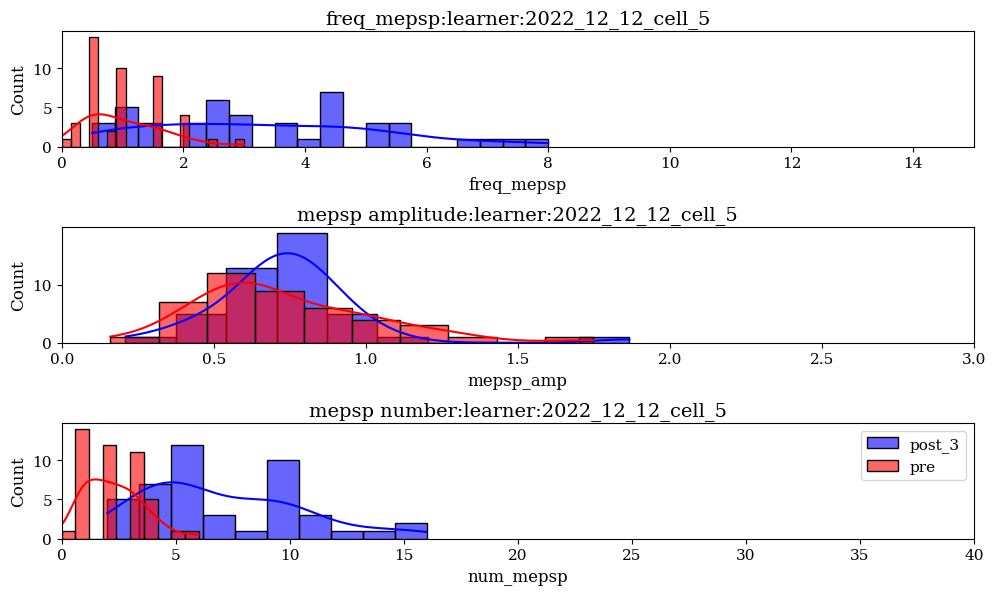

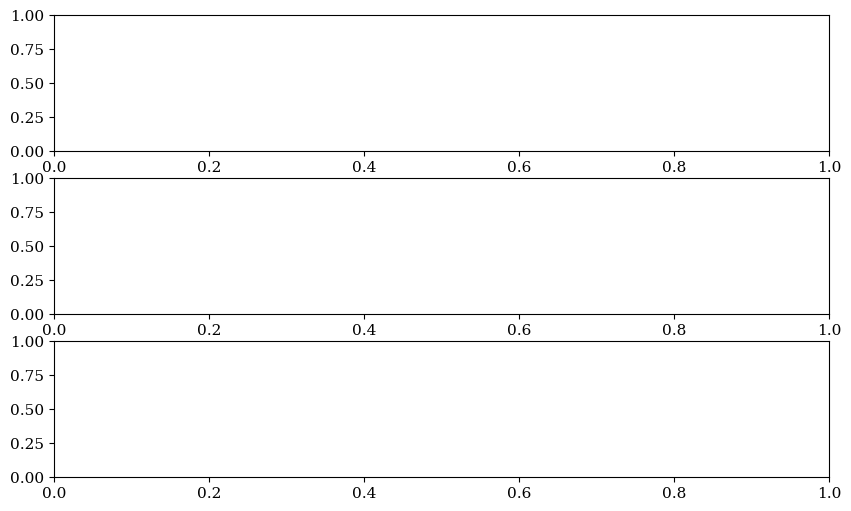

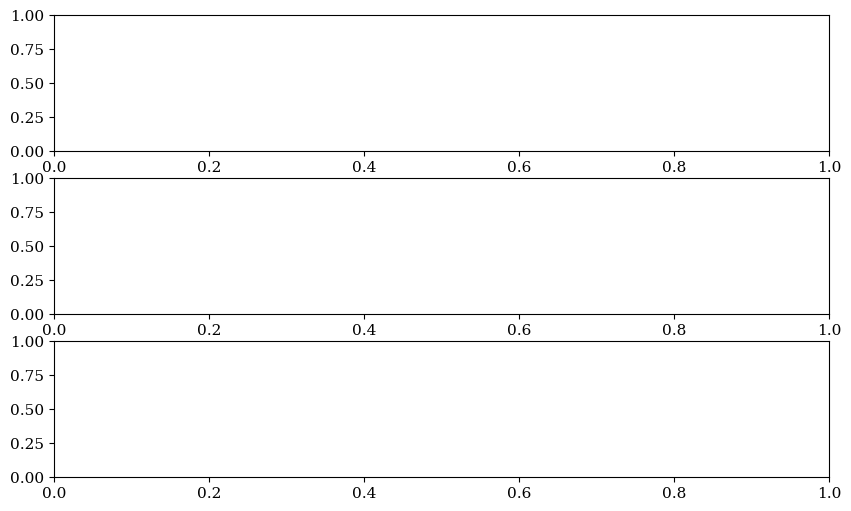

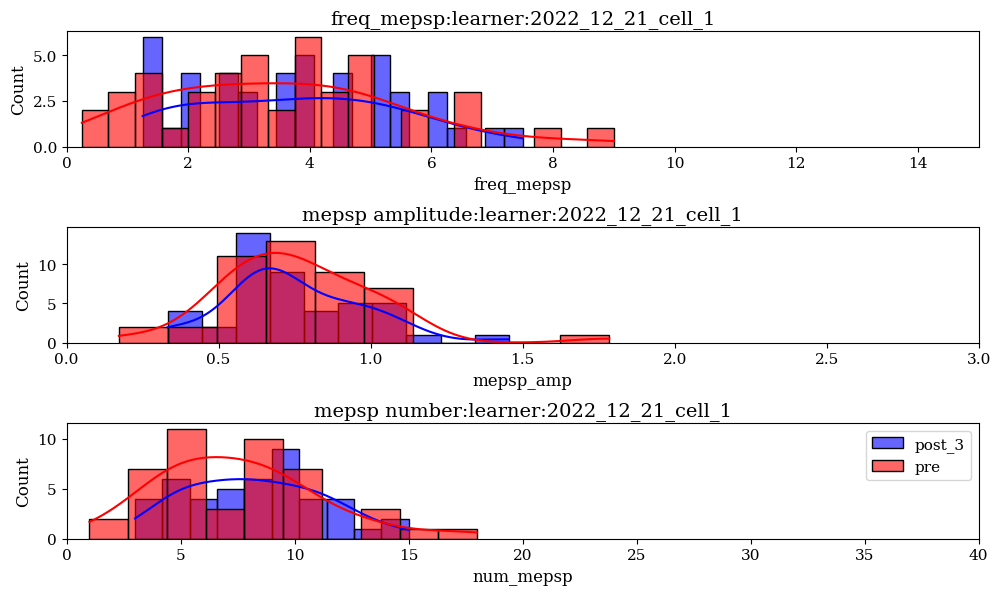

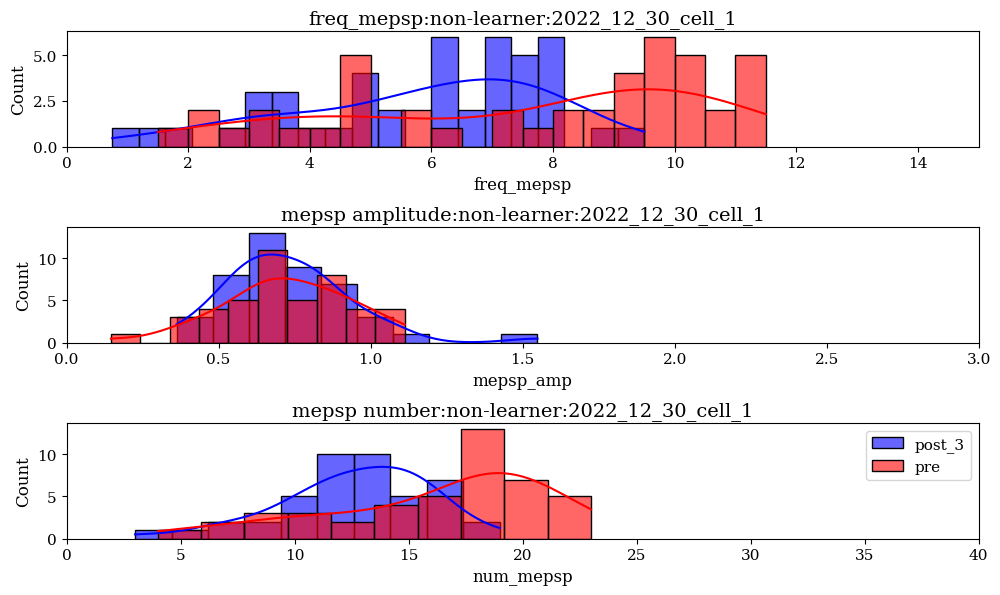

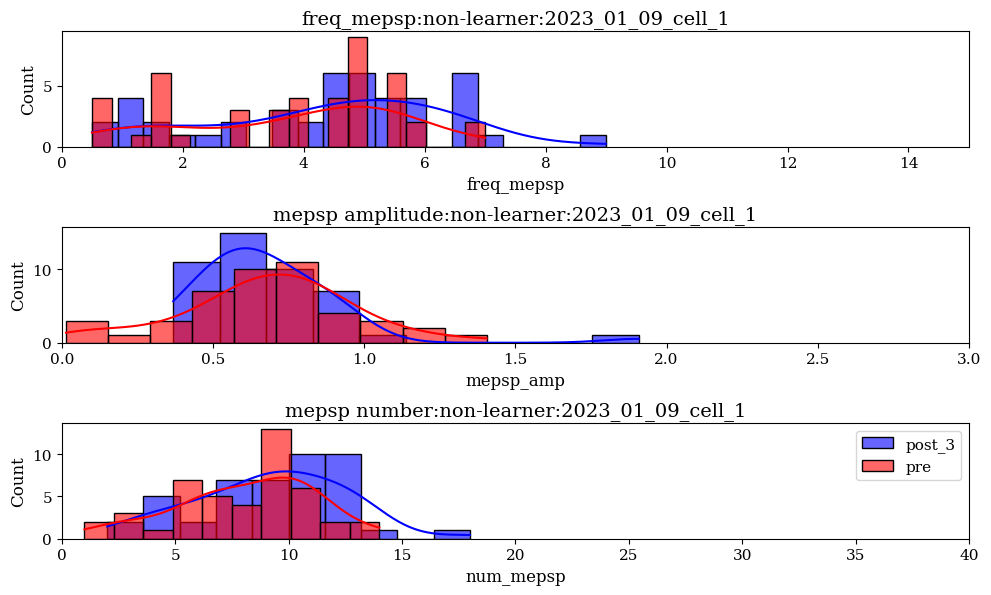

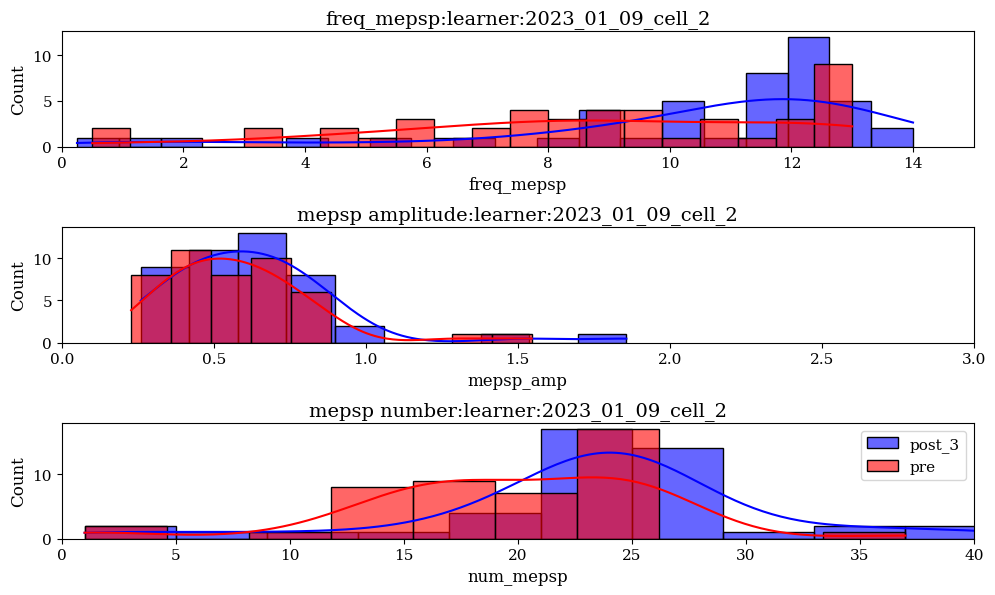

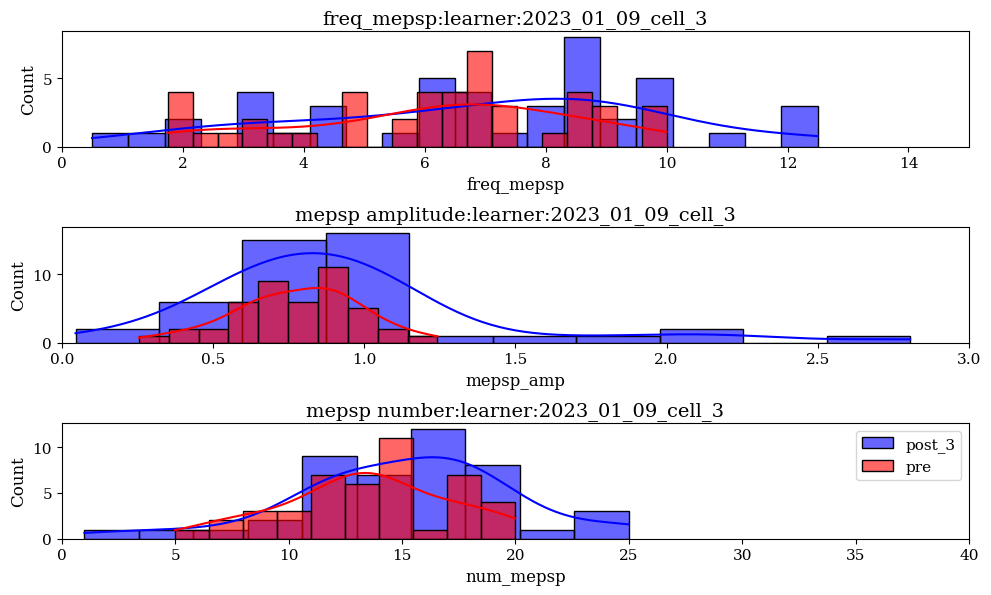

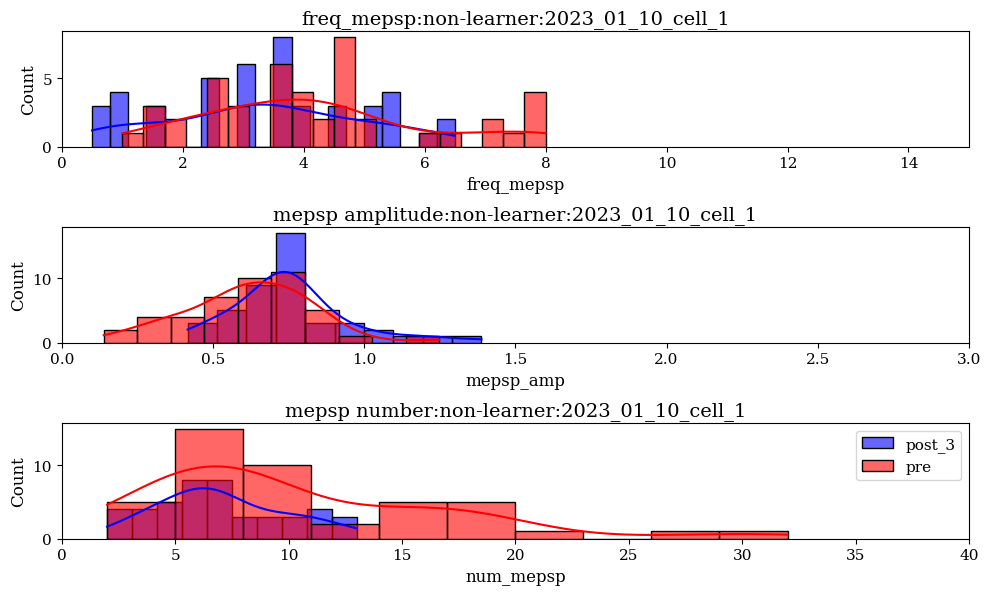

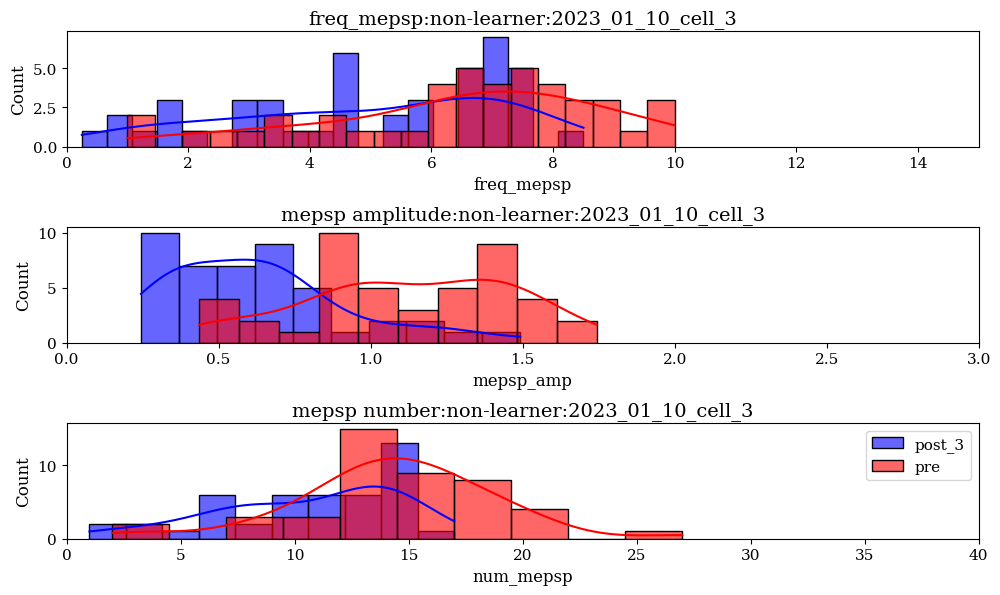

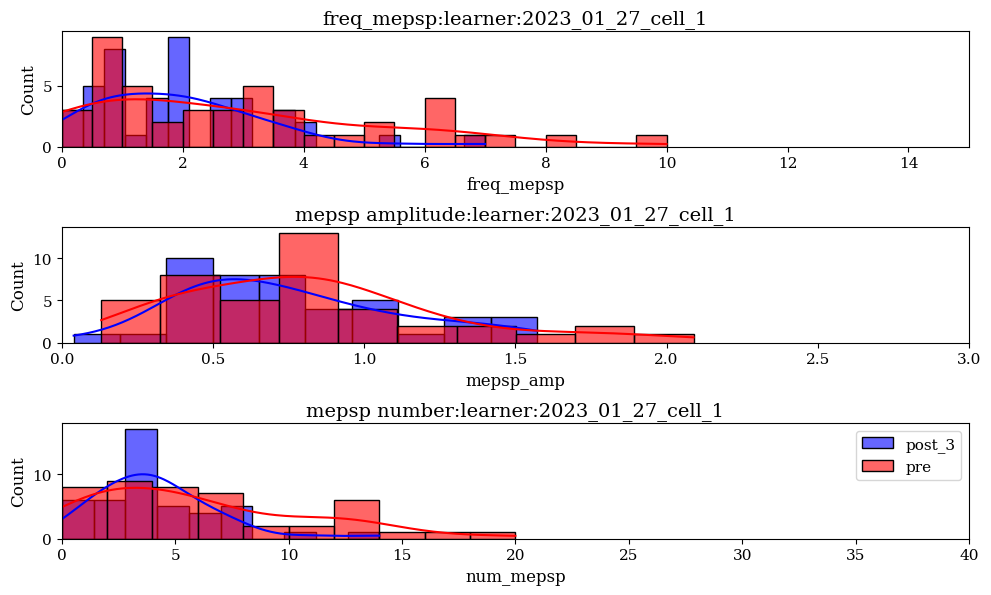

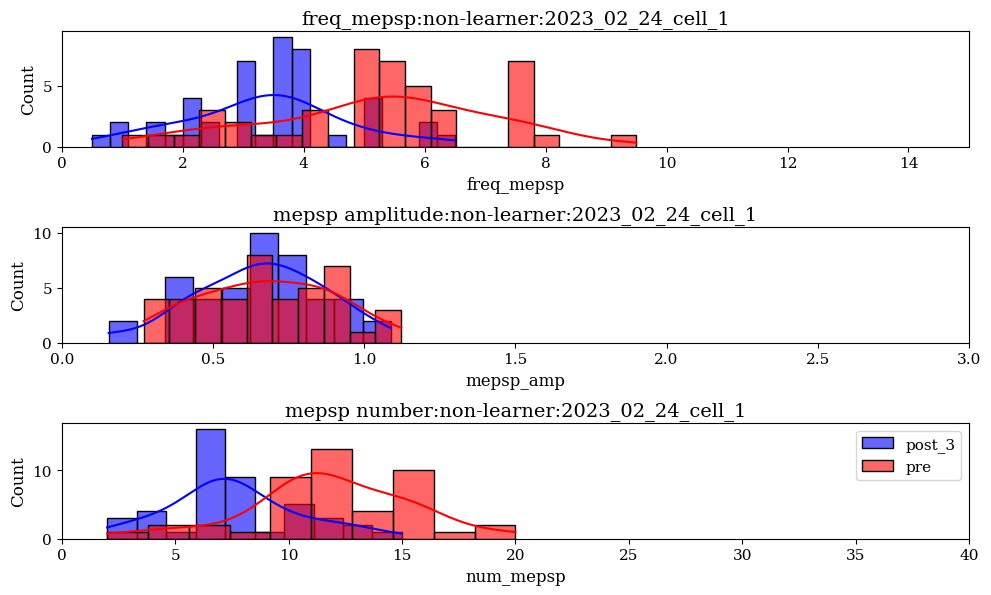

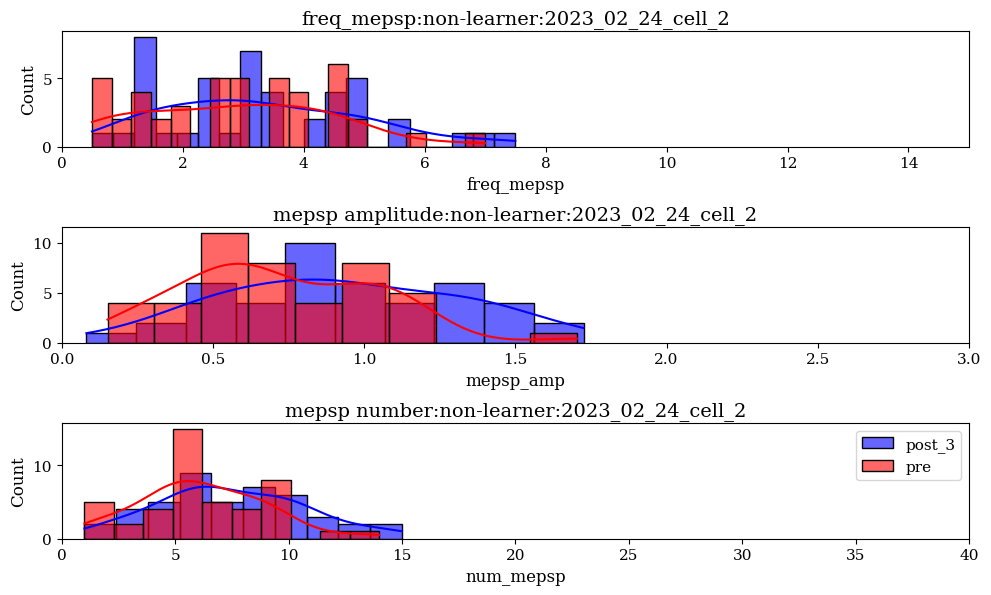

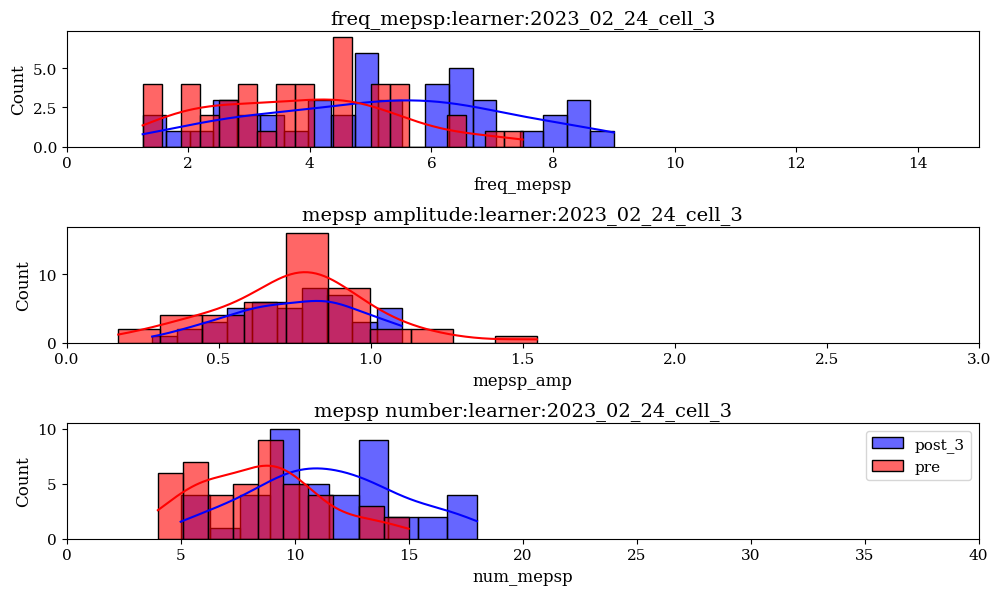

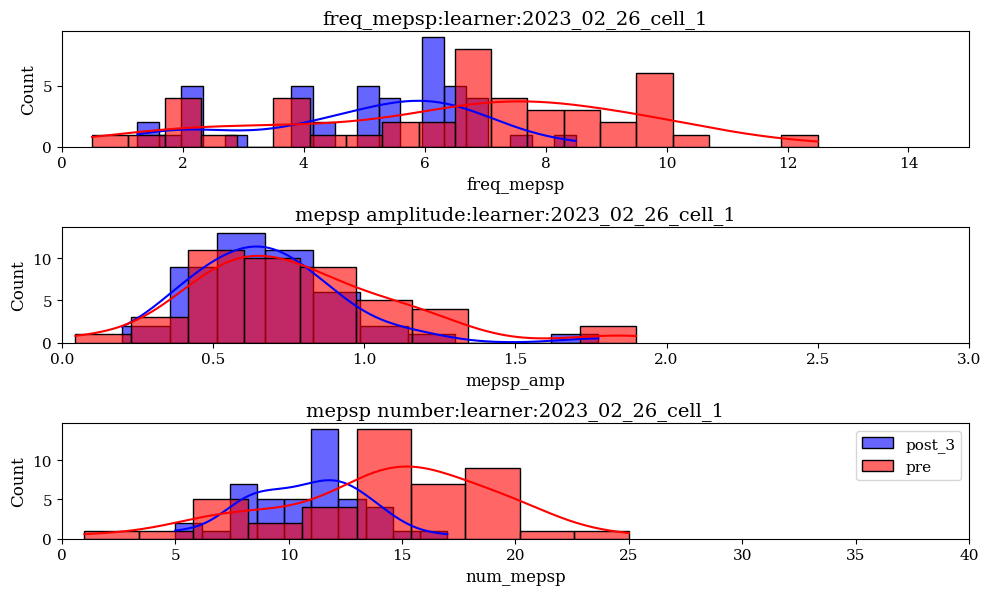

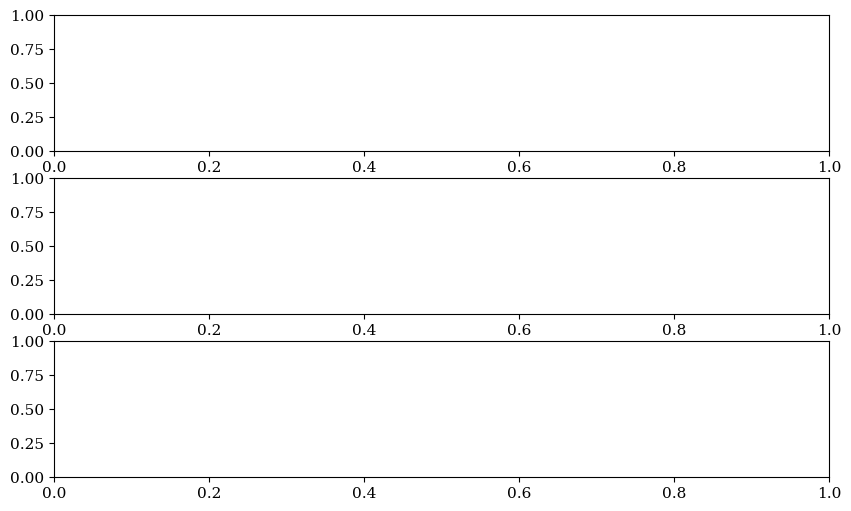

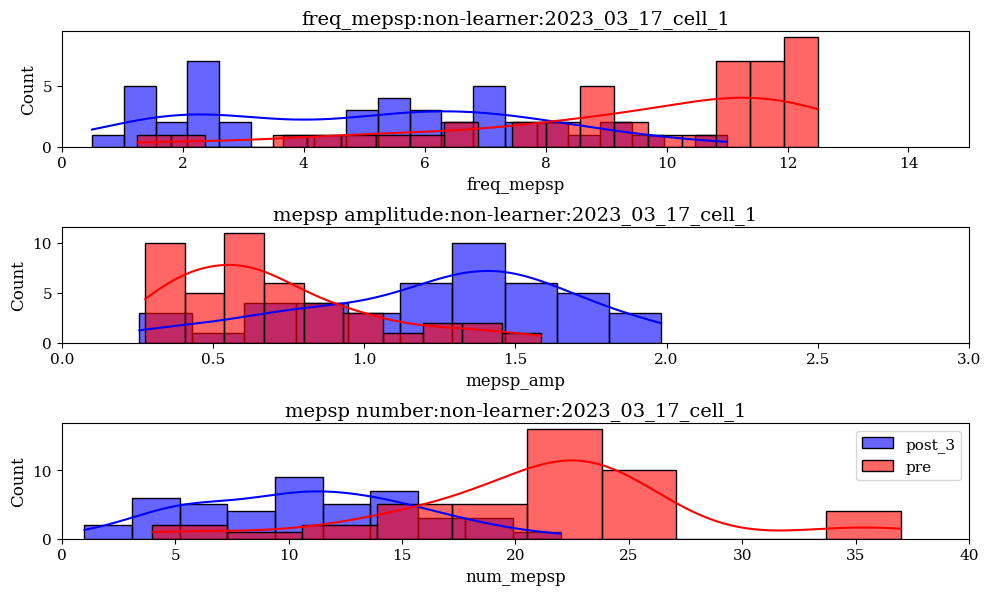

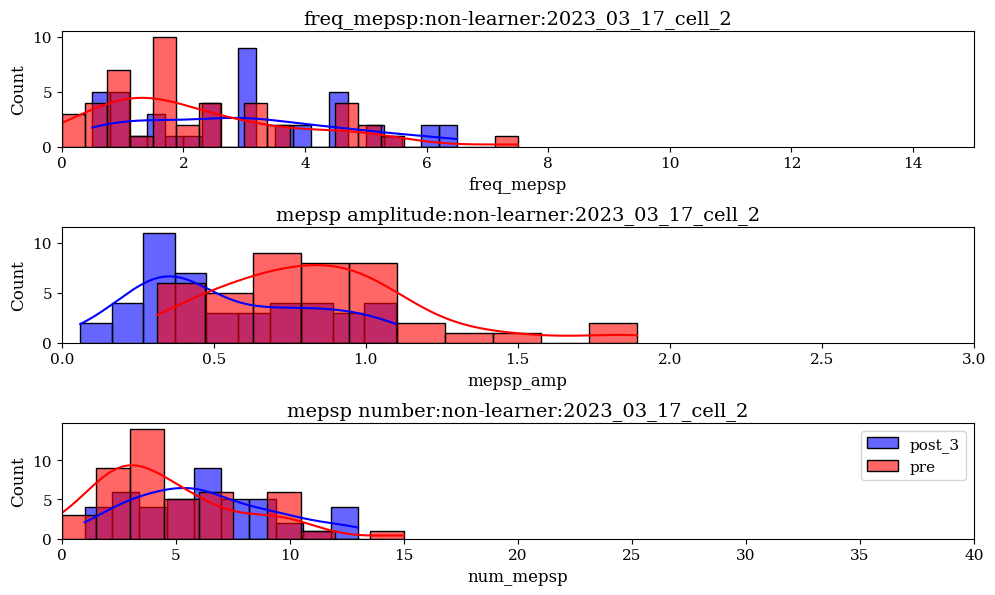

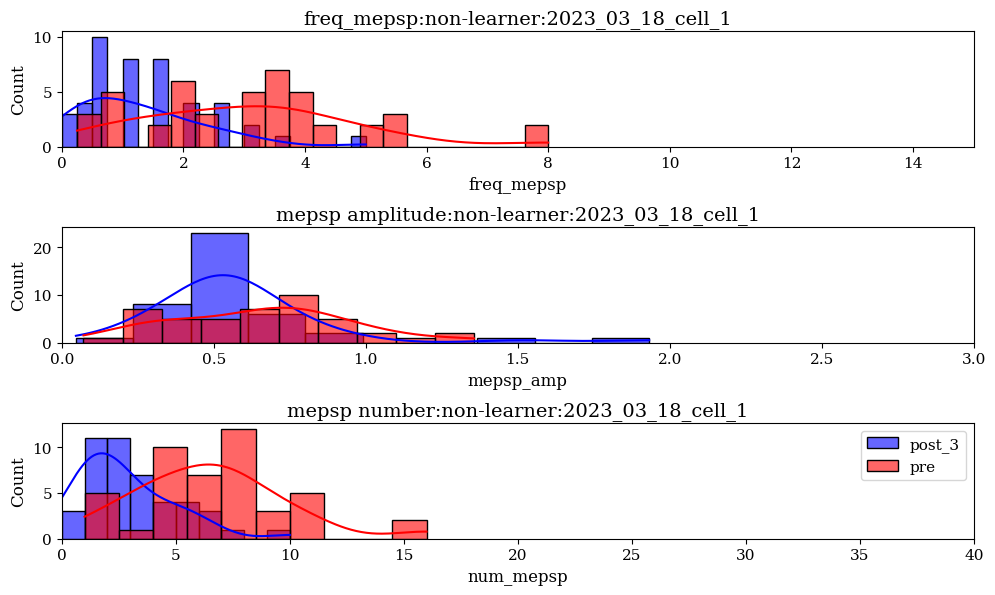

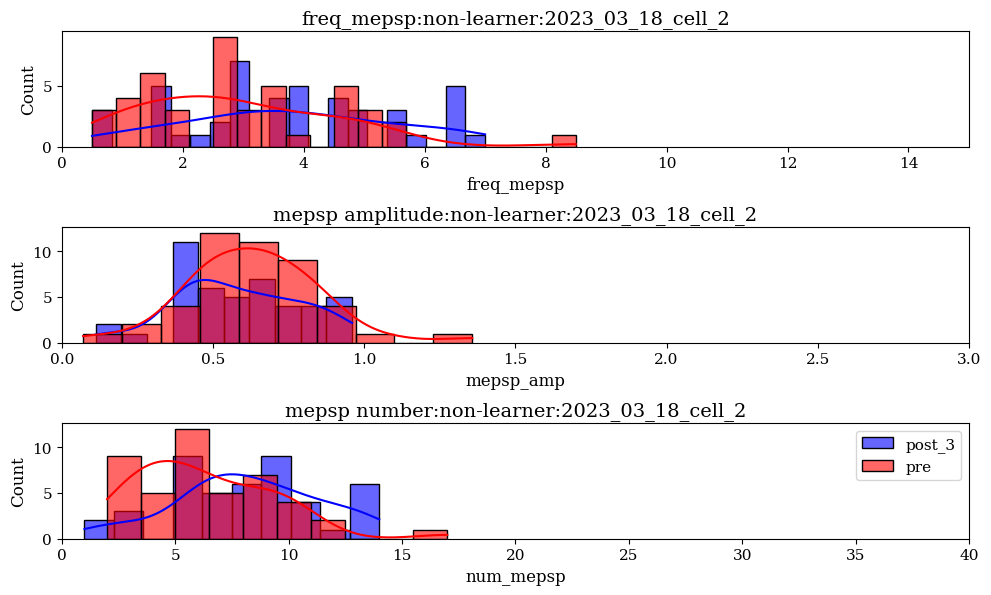

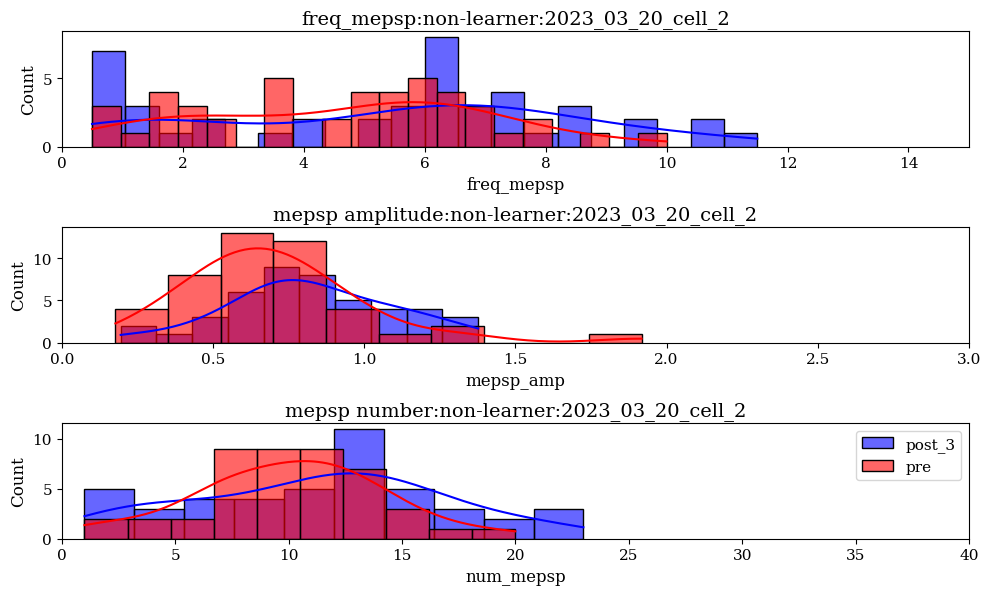

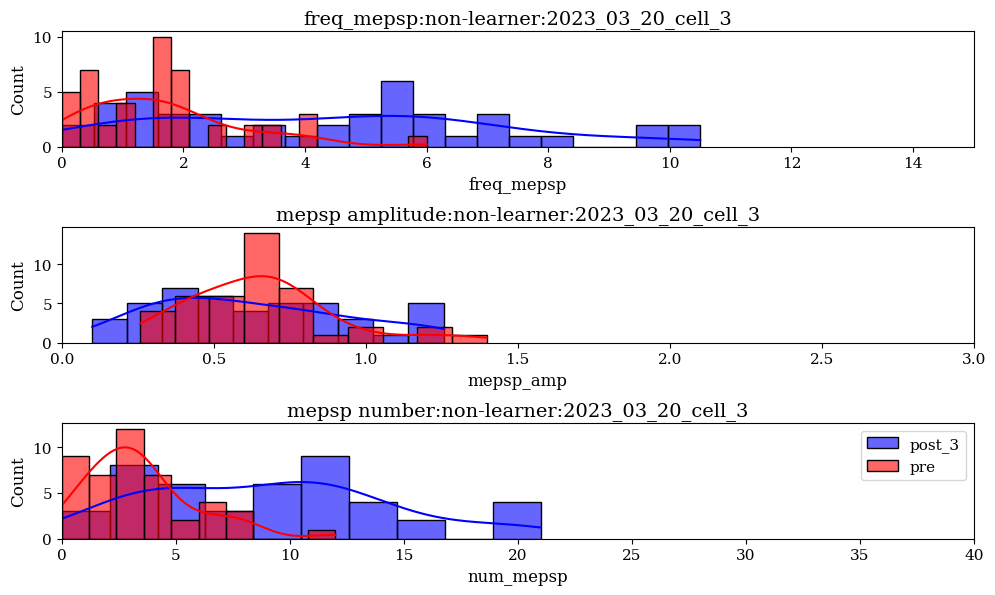

In [460]:
mepsp_distribution_plot(all_cells_all_trails_extracted_featrues,"freq_mepsp",learners,non_learners)

In [332]:
curve_fit_data = pd.read_hdf("/Users/anzalks/Documents/pattern_learning_paper/plotting_scripts/python_scripts_paper_ready/analysis_scripts/pickle_files_from_analysis/curvefir_results.h5")

In [134]:
curve_fit_data.columns

Index(['cell_ID', 'pre_post_status', 'frame_type', 'Epk', 'Etau', 'Ipk',
       'Itau', 'delay', 'initDelay', 'score'],
      dtype='object')

In [143]:
cell_dict_classified = pd.read_pickle("/Users/anzalks/Documents/pattern_learning_paper/plotting_scripts/python_scripts_paper_ready/analysis_scripts/pickle_files_from_analysis/all_cells_fnorm_classifeied_dict.pickle")

In [246]:
learners = cell_dict_classified["ap_cells"]["cell_ID"].unique()
non_learners = cell_dict_classified["an_cells"]["cell_ID"].unique()

In [136]:
def norm_values(cell_list,val_to_plot):
    cell_list = cell_list.copy()
    #print(f"cell list inside func : {cell_list}")
    cell_grp=cell_list.groupby(by="cell_ID")
    for c, cell in cell_grp:
        pat_grp = cell.groupby(by="frame_type")
        for p,pat in pat_grp:
            if "pattern" not in p:
                continue
            else:
                #print(f"c:{c}, p:{p}")
                pre_val= float(cell[(cell["cell_ID"]==c)&(cell["frame_type"]==p)&(cell["pre_post_status"]=="pre")][val_to_plot])
                pp_grp = pat.groupby(by="pre_post_status")
                for pr, pp in pp_grp:
                    norm_val = float(cell[(cell["cell_ID"]==c)&(cell["frame_type"]==p)&(cell["pre_post_status"]==pr)][val_to_plot])
                    norm_val = (norm_val/pre_val)*100
                    cell_list.loc[(cell_list["cell_ID"]==c)&(cell_list["frame_type"]==p)&(cell_list["pre_post_status"]==pr),val_to_plot]=norm_val
    return cell_list
   
def plot_cell_dist(catcell_dist,val_to_plot,fig,axs,pattern_number,y_lim,
                   x_label, cell_type,plt_color,resp_color):
    pat_num=int(pattern_number.split("_")[-1])
    num_cells= len(catcell_dist["cell_ID"].unique())
    pfd = catcell_dist.groupby(by="frame_type")
    for c, pat in pfd:
        pat[f"{val_to_plot}"].where(pat[f"{val_to_plot}"] <1000, np.nan, inplace=True)
        if c != pattern_number:
            continue
        else:
            order = np.array(('pre','post_0','post_1','post_2','post_3'),dtype=object)
            g=sns.stripplot(data=pat, x="pre_post_status",y=f"{val_to_plot}",
                            order=order,ax=axs,color=resp_color,
                            alpha=0.6,size=8, label='cell response')#alpha=0.8,
            sns.pointplot(data=pat, x="pre_post_status",y=f"{val_to_plot}",
                          errorbar="se",order=order,capsize=0.08,ax=axs,
                          color=plt_color, linestyles='dotted',scale = 0.8,
                         label="average cell response")
            g.set_title(None)
            #"""
            pvalList = []
            anotp_list = []
            for i in order[1:]:
                posti ="post{i}"
                #non parametric, paired and small sample size, hence used Wilcoxon signed-rank test
                #Wilcoxon signed-rank test
                posti= spst.wilcoxon(pat[pat["pre_post_status"]=='pre'][f"{val_to_plot}"],pat[pat["pre_post_status"]==i][f"{val_to_plot}"],
                                     zero_method="wilcox", correction=True)
                pvalList.append(posti.pvalue)
                anotp_list.append(("pre",i))
            annotator = Annotator(axs,anotp_list,data=pat, 
                                  x="pre_post_status",
                                  y=f"{val_to_plot}",
                                  order=order,
                                 fontsize=8)
            #annotator = Annotator(axs[pat_num],[("pre","post_0"),("pre","post_1"),("pre","post_2"),("pre","post_3")],data=cell, x="pre_post_status",y=f"{col_pl}")
            annotator.set_custom_annotations([bpf.convert_pvalue_to_asterisks(a) for a in pvalList])
            annotator.annotate()
            #"""
            axs.axhline(100, ls=':',color="k", alpha=0.4)
            if pat_num==0:
                sns.despine(fig=None, ax=axs, top=True, right=True, 
                            left=False, bottom=False, offset=None, trim=False)
                axs.set_ylabel("% change in\nEPSP amplitude")
                axs.set_xlabel(None)
                #axs[pat_num].set_yticks([])
            elif pat_num==1:
                sns.despine(fig=None, ax=axs, top=True, right=True, 
                            left=False, bottom=False, offset=None, trim=False)
                axs.set_ylabel(None)
                axs.set_yticklabels([])
                if cell_type=="dep_cells":
                    axs.set_xlabel(x_label)
                else:
                    axs.set_xlabel(None)
            elif pat_num==2:
                sns.despine(fig=None, ax=axs, top=True, right=True, 
                            left=False, bottom=False, offset=None, trim=False)
                axs.set_xlabel(None)
                axs.set_ylabel(None)
                axs.set_yticklabels([])
            else:
                pass 
            g.set(ylim=y_lim)
            g.set_xticklabels(time_points,rotation=0)
            g.legend_.remove()
            if cell_type!="dep_cells":
                axs.set_xticklabels([])
            else:
                pass 


    ax_pos = axs.get_position()
    #new_ax_pos = [ax_pos.x0-0.02, ax_pos.y0, ax_pos.width,
    #              ax_pos.height]
    #axs.set_position(new_ax_pos)




def plot_cell_category_classified_EPSP_features(esp_feat_cells_df,val_to_plot,
                                                fig,axs1,axs2,axs3,cell_type):
    cell_df= norm_values(esp_feat_cells_df,val_to_plot)
    if cell_type=="pot_cells":
        strp_color = bpf.CB_color_cycle[0]
        line_color = bpf.CB_color_cycle[5]
        y_lim = (-100,800)
        x_label = None
    elif cell_type=="dep_cells":
        strp_color = bpf.CB_color_cycle[1]
        line_color = bpf.CB_color_cycle[5]
        y_lim = (-200,500)
        x_label = "time points (mins)"
    else:
        y_lim=None
        strp_color = bpf.CB_color_cycle[1]
        line_color = bpf.CB_color_cycle[5]
        x_label = "time points (mins)"
        print("uncagerised cell")
        
    plot_cell_dist(cell_df,val_to_plot,fig,axs1,"pattern_0",
                   y_lim,x_label,cell_type,line_color,strp_color
                  )
    plot_cell_dist(cell_df,val_to_plot,fig,axs2,"pattern_1",
                   y_lim,x_label,cell_type,line_color,strp_color
                  )
    plot_cell_dist(cell_df,val_to_plot,fig,axs3,"pattern_2",
                   y_lim,x_label,cell_type,line_color,strp_color
                  )

In [119]:
def classify_cells_curve_fit(cell_dict_classified,curve_fit_data):
    cell_grps =curve_fit_data.groupby(by="cell_ID")
    learners_list = cell_dict_classified["ap_cells"]["cell_ID"].unique()
    non_learners_list = cell_dict_classified["an_cells"]["cell_ID"].unique()
    #print(non_learners_list)
    learners=[]
    non_learners =[]
    for cell, cell_data in cell_grps:
        if cell in learners_list:
            cell_data["cell_ID"]=cell
            learners.append(cell_data)
            #print("learner", cell)
        elif cell in non_learners_list:
            cell_data["cell_ID"]=cell
            non_learners.append(cell_data)
            #print("non-learner", cell)
        else:
            pass
            #print("uncategorised")
    learners=pd.concat(learners)
    non_learners = pd.concat(non_learners)
    return learners, non_learners
    

In [550]:
learners,non_learners = classify_cells_curve_fit(cell_dict_classified,curve_fit_data)

In [558]:
learners["cell_ID"].unique()

array(['2022_12_12_cell_5', '2022_12_21_cell_1', '2023_01_09_cell_2',
       '2023_01_09_cell_3', '2023_01_27_cell_1', '2023_02_24_cell_3',
       '2023_02_26_cell_1'], dtype=object)

In [140]:
def plot_feature_from_curve_fit(feature_to_plot):
    learners,non_learners = classify_cells_curve_fit(cell_dict_classified,curve_fit_data)
    fig = plt.figure()
    #plot patterns
    axs1 = fig.add_subplot(131)
    axs2 = fig.add_subplot(132)
    axs3 = fig.add_subplot(133)

    plot_cell_category_classified_EPSP_features(learners,feature_to_plot,fig,axs1,axs2,axs3,"pot_cells")

    axs2.set_title(f"learners: {feature_to_plot}")
    plt.show()
    plt.close(fig)
    
    fig = plt.figure()
    #plot patterns
    axs1 = fig.add_subplot(131)
    axs2 = fig.add_subplot(132)
    axs3 = fig.add_subplot(133)
    
    plot_cell_category_classified_EPSP_features(non_learners,feature_to_plot,fig,axs1,axs2,axs3,"dep_cells")
    
    axs2.set_title(f"non-learners: {feature_to_plot}")
    plt.show()
    plt.close(fig)


In [151]:
features_to_plot = list(curve_fit_data.columns)[3:-1]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: *
pre vs. post_1: *
pre vs. post_2: *
pre vs. post_3: *
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: *
pre vs. post_1: ns
pre vs. post_2: *
pre vs. post_3: *
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns


/Users/anzalks/miniconda3/envs/lab_env/lib/python3.10/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


pre vs. post_2: ns
pre vs. post_3: ns


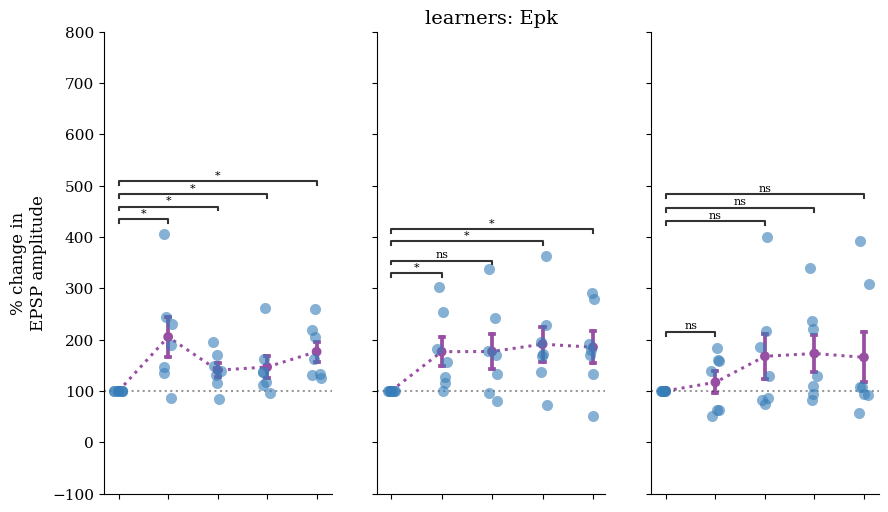

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: **
pre vs. post_3: ***
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: *
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns


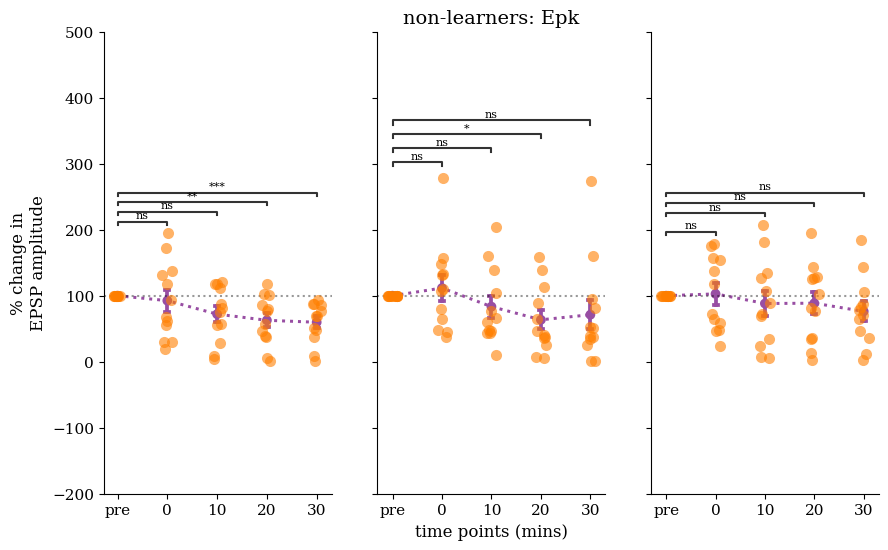

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: *
pre vs. post_1: ns
pre vs. post_2: *
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns


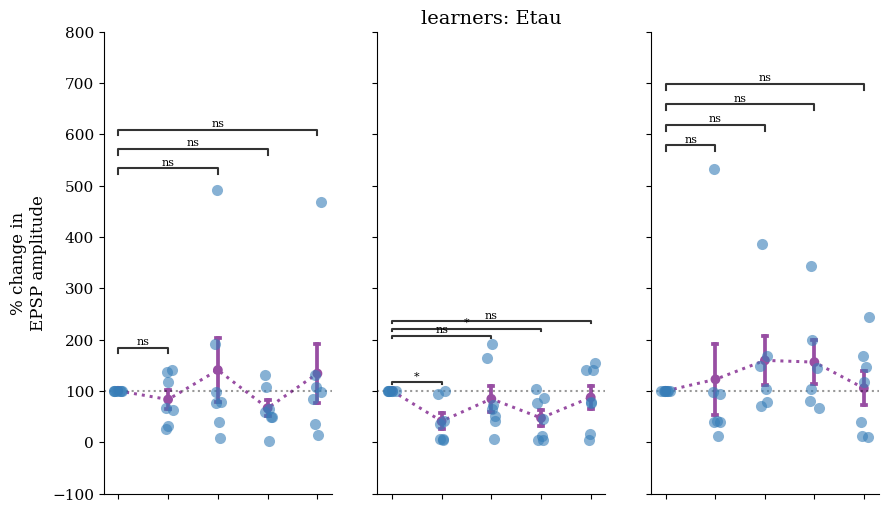

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: *
pre vs. post_3: **
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: *
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns


/Users/anzalks/miniconda3/envs/lab_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns


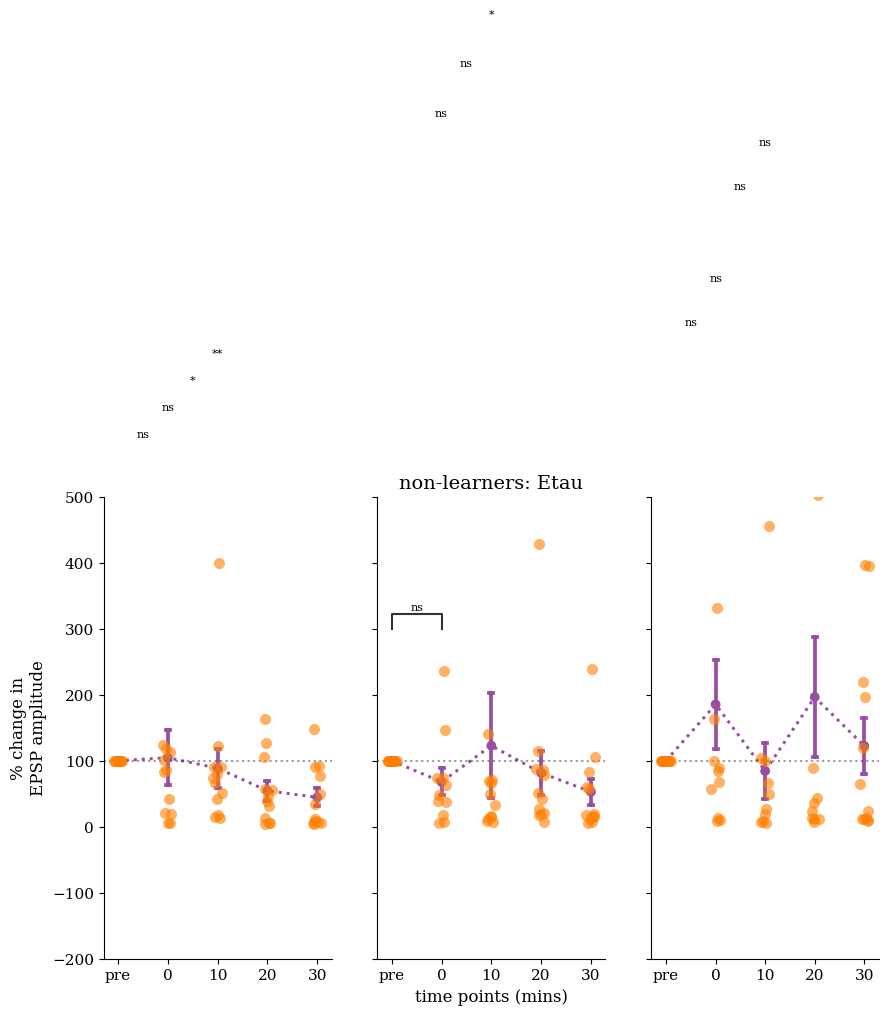

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: *
pre vs. post_2: *
pre vs. post_3: *


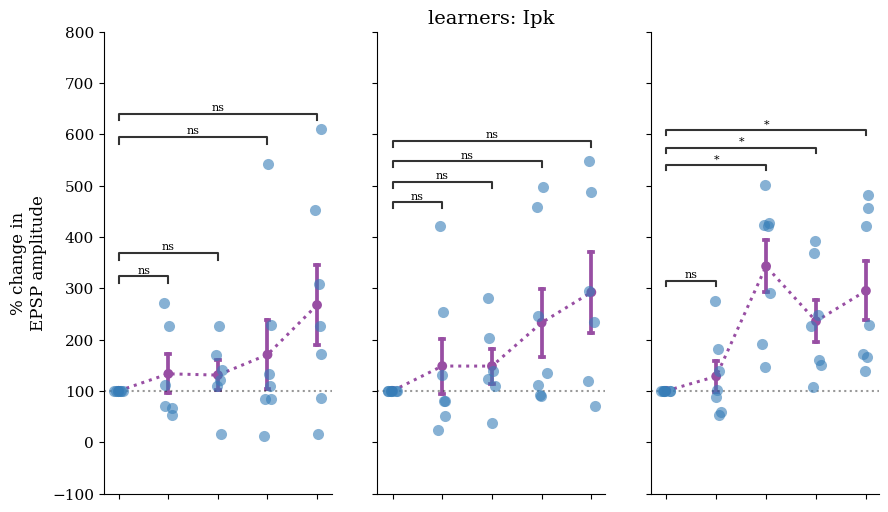

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: *
pre vs. post_3: *


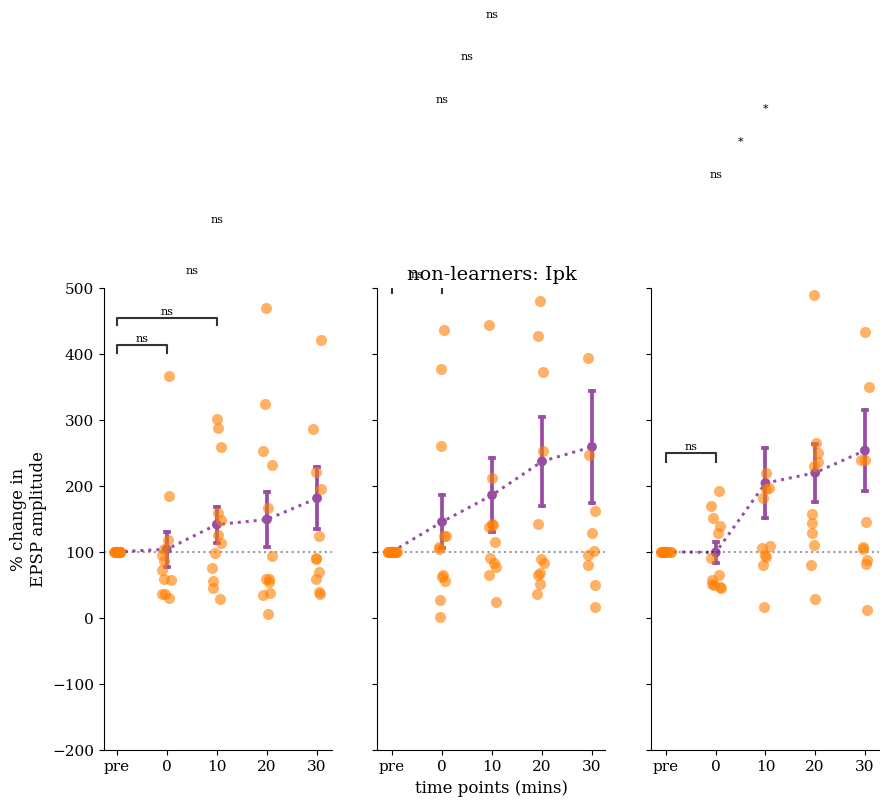

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: *
pre vs. post_3: ns


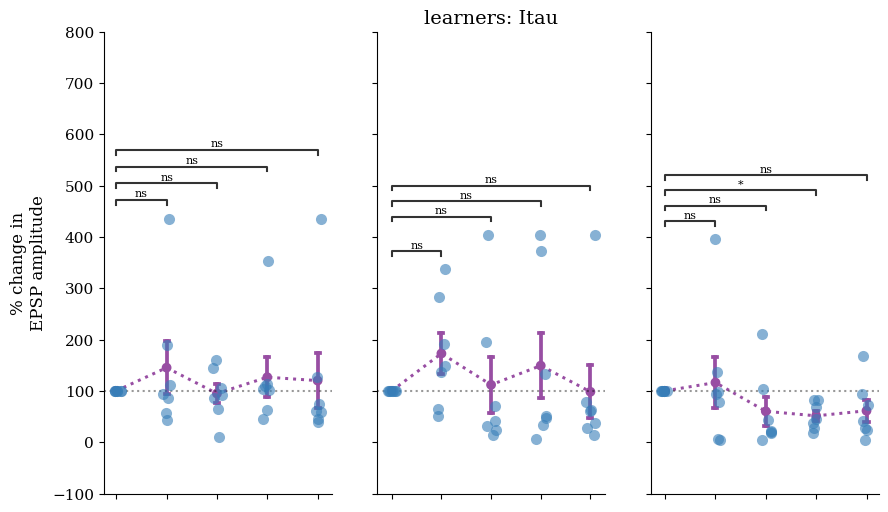

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: *
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: **
pre vs. post_3: ***
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns


/Users/anzalks/miniconda3/envs/lab_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns


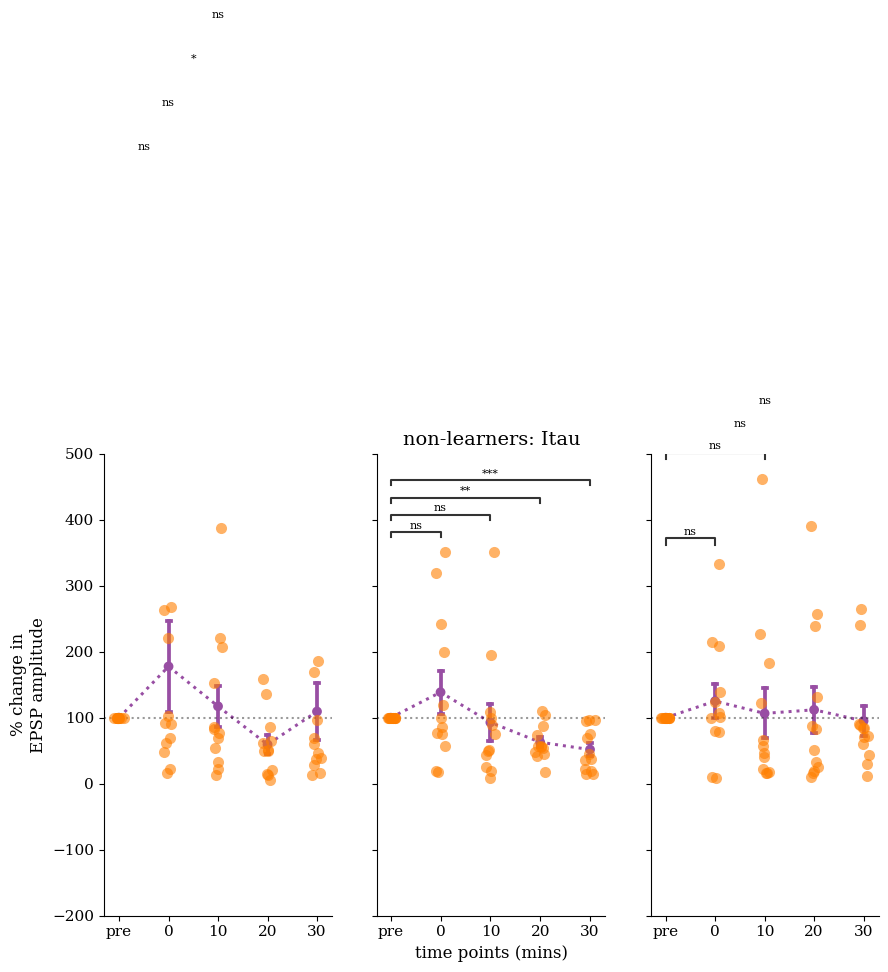

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns


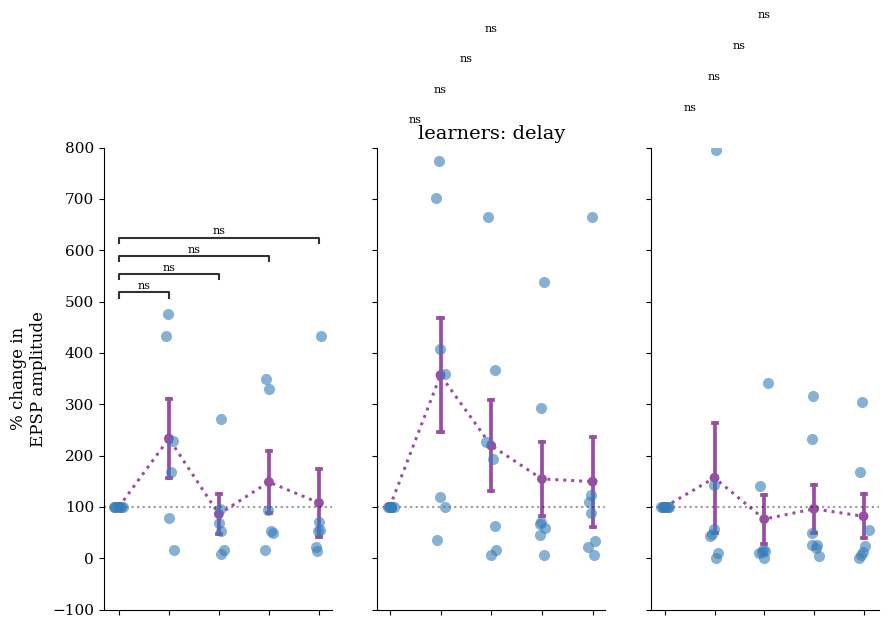

/Users/anzalks/miniconda3/envs/lab_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: **
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns


/Users/anzalks/miniconda3/envs/lab_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


pre vs. post_1: *
pre vs. post_2: ns
pre vs. post_3: ns


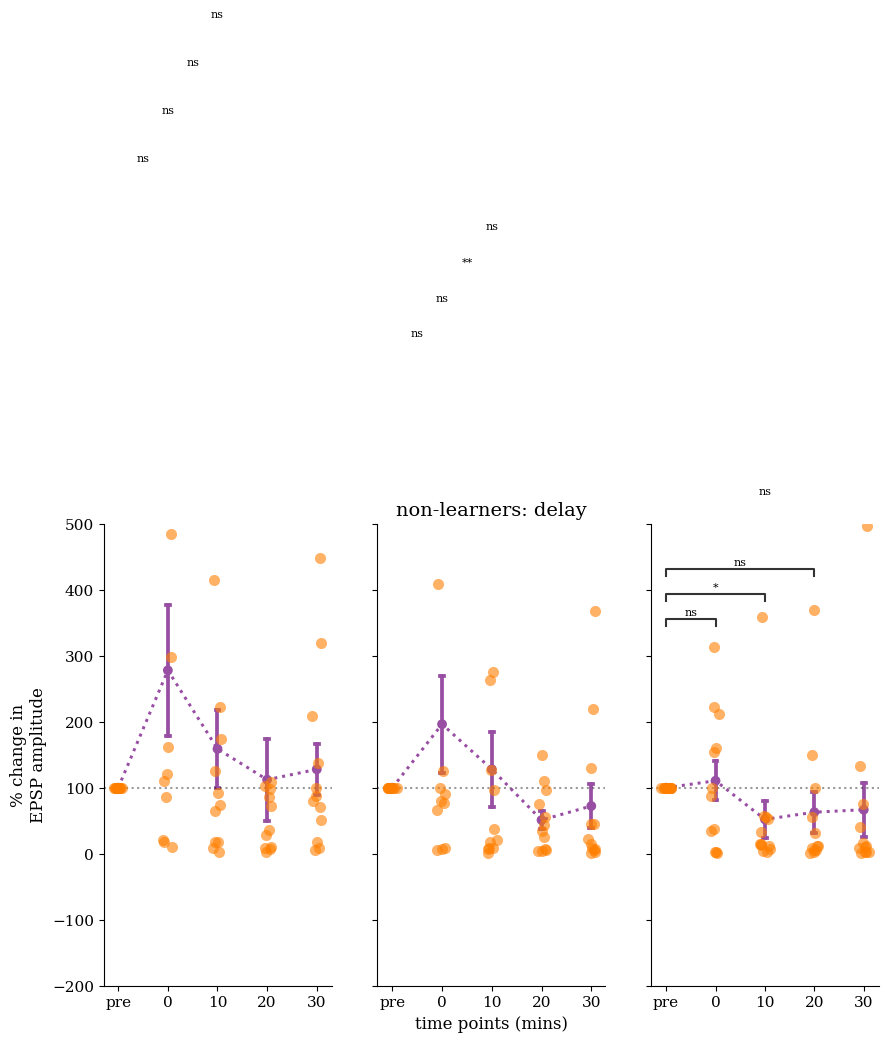

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns


/Users/anzalks/miniconda3/envs/lab_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/anzalks/miniconda3/envs/lab_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns


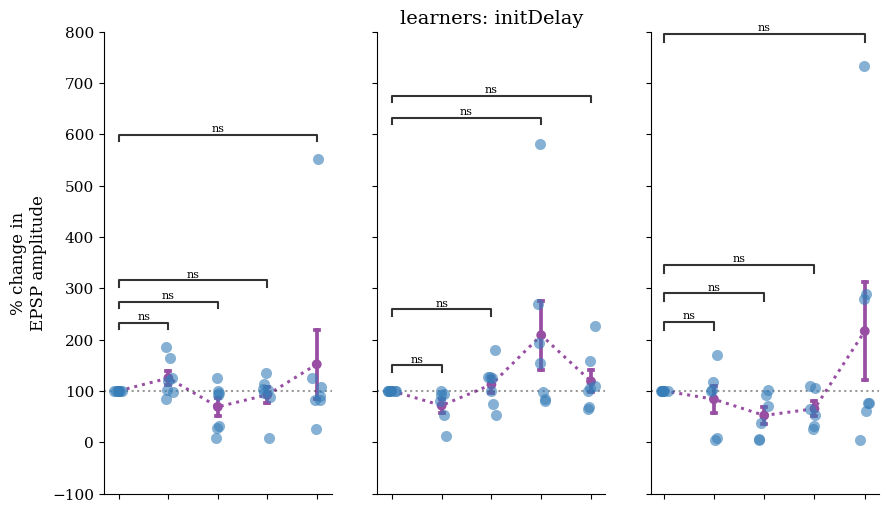

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns


/Users/anzalks/miniconda3/envs/lab_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/anzalks/miniconda3/envs/lab_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post_0: ns
pre vs. post_1: ns
pre vs. post_2: ns
pre vs. post_3: ns


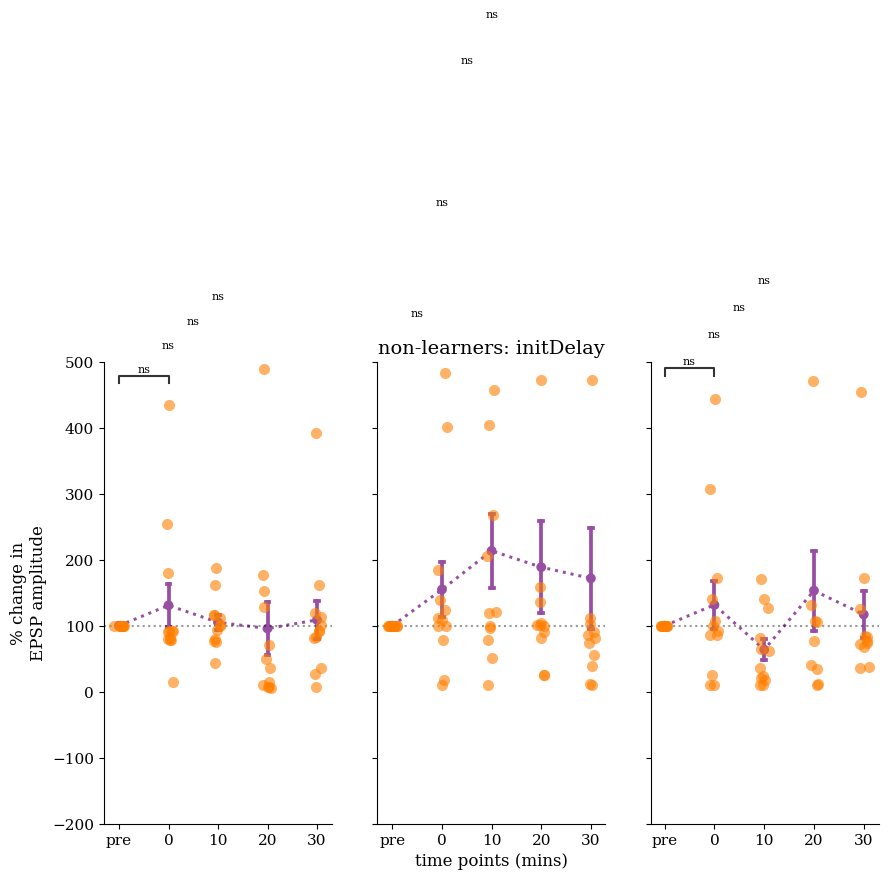

In [153]:
for feature in features_to_plot:
    plot_feature_from_curve_fit(feature)

In [ ]:
raw_data_df =pd.read_pickle("/Users/anzalks/Documents/pattern_learning_paper/plotting_scripts/python_scripts_paper_ready/data/pickle_files/all_data_with_training_df.pickle")

In [471]:
training_data= raw_data_df[raw_data_df["frame_id"].str.contains("training", case=False, na=False)]

In [476]:
training_data

,cell_ID,pre_post_status,sampling_rate(Hz),frame_status,frame_id,trial_no,cell_trace(mV),field_trace(mV),pd_trace(V),ttl_trace(V),time(s)
17677060,2022_12_12_cell_5,training,20000.0,training,training_0,0,-64.535522,0.043030,0.010681,0.018311,0.053002
17677061,2022_12_12_cell_5,training,20000.0,training,training_0,0,-64.526367,0.046997,0.012207,0.018921,0.053052
17677062,2022_12_12_cell_5,training,20000.0,training,training_0,0,-64.535522,0.049591,0.012817,0.016479,0.053102
17677063,2022_12_12_cell_5,training,20000.0,training,training_0,0,-64.550781,0.040741,0.011902,0.017395,0.053152
17677064,2022_12_12_cell_5,training,20000.0,training,training_0,0,-64.547729,0.033112,0.147705,1.569519,0.053202
...,...,...,...,...,...,...,...,...,...,...,...
394346055,2023_03_20_cell_3,training,20000.0,training,training_99,4,-42.633057,0.086365,0.010376,0.014343,1.052796
394346056,2023_03_20_cell_3,training,20000.0,training,training_99,4,-42.974854,0.097656,0.010986,0.016174,1.052846
394346057,2023_03_20_cell_3,training,20000.0,training,training_99,4,-43.295288,0.074463,0.010681,0.015259,1.052896
394346058,2023_03_20_cell_3,training,20000.0,training,training_99,4,-43.576050,0.074463,0.010986,0.019836,1.052946


In [514]:
def extract_training_data(cell_data):
    cell_data = cell_data[cell_data["frame_id"].str.contains("training", case=False, na=False)]
    cell_grp = cell_data.groupby(by="cell_ID")
    cell_list = []
    for cell, cell_data in cell_grp:
        sampling_rate = int(cell_data["sampling_rate(Hz)"].unique())
        trial_grp = cell_data.groupby(by="trial_no")
        for trial, trial_data in trial_grp:
            trace=trial_data["cell_trace(mV)"].to_numpy()
            trace=substract_baseline(trace,sampling_rate, 5)
            ttl=trial_data["ttl_trace(V)"].to_numpy()
            trigger=np.argmax(ttl>0.5)
            trigger_time = (trigger/sampling_rate)*1000
            trigger_val = ttl[trigger]
            cell_thresh=np.argmax(trace>0.25)
            cell_thresh_time = (cell_thresh/sampling_rate)*1000
            cell_thresh_val = trace[cell_thresh]
            cell_list.append([cell,trial,trigger_time,trigger_val,cell_thresh_time,cell_thresh_val,trace])
            clist_header=["cell_ID","trial_no","trigger_time","trigger_val","cell_thresh_time","cell_thresh_val","trace"]
    pd_cell_list =pd.concat(pd.DataFrame([i],columns=clist_header) for i in tqdm(cell_list))
    return pd_cell_list

In [561]:
training_data = extract_training_data(raw_data_df)

/var/folders/sc/cpss_44j20qbqjd8khtbyldc0000gn/T/ipykernel_42361/3546392578.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sampling_rate = int(cell_data["sampling_rate(Hz)"].unique())
100%|███████████████████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 5087.42it/s]


2022_12_19_cell_2 no selection
2022_12_19_cell_3 no selection
2023_02_28_cell_1 no selection
[0.2]


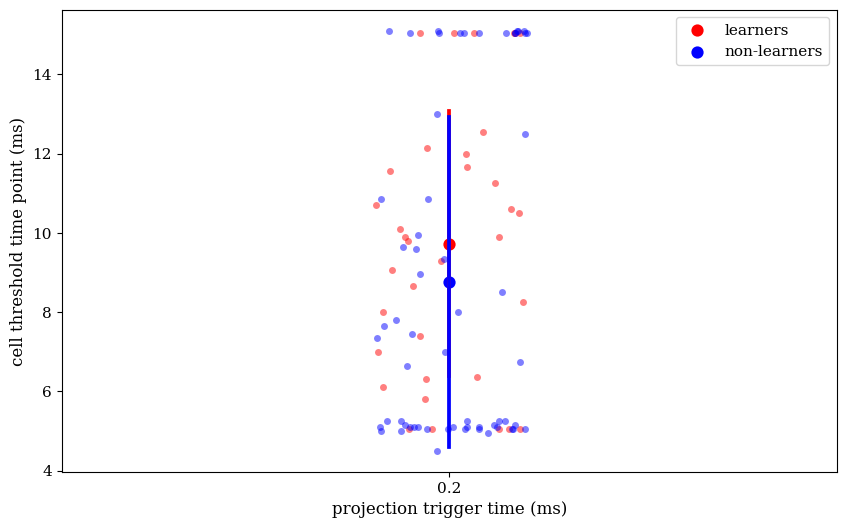

In [582]:
def plot_threshold_timing(training_data,learners,non_learners):
    fig,axs =plt.subplots(1,1)
    cell_grp = training_data.groupby(by="cell_ID")
    lrns=[]
    non_lrns=[]
    for cell, cell_data in cell_grp:
        if cell in learners:
            lrns.append(cell_data)
        elif cell in non_learners:
            non_lrns.append(cell_data)
        else:
            print(cell,"no selection")
            continue
    #print(lrns)
    #print(non_lrns)
    lrns = pd.concat(lrns)
    non_lrns = pd.concat(non_lrns)
    print(non_lrns["trigger_time"].unique())

    sns.pointplot(data=lrns,x="trigger_time", y="cell_thresh_time", color="red",errorbar="sd",dodge=True,ax=axs, label="learners")
    sns.pointplot(data=non_lrns,x="trigger_time", y="cell_thresh_time",color="blue",errorbar="sd" ,dodge=True,ax=axs, label="non-learners")

    sns.stripplot(data=lrns,x="trigger_time", y="cell_thresh_time", color="red",alpha=0.5)
    sns.stripplot(data=non_lrns,x="trigger_time", y="cell_thresh_time",color="blue",alpha=0.5)
    axs.set_ylabel("cell threshold time point (ms)")
    axs.set_xlabel("projection trigger time (ms)")
    plt.legend()
    plt.show()
    plt.close()
plot_threshold_timing(training_data,learners,non_learners)

In [34]:
from pathlib import Path
import neo.io as nio
folder_path = Path("/Users/anzalks/Documents/Expt_data/CA1_recordings/x_spread_recording_02Hz_30mins/cells_cumulated/cells_min_30mins_long")
cell_stats= pd.read_hdf("/Users/anzalks/Documents/pattern_learning_paper/plotting_scripts/python_scripts_paper_ready/data/pickle_files/cell_stats.h5")

In [285]:
def list_folder(p):
    f_list = []
    f_list = list(p.glob('*_cell_*'))
    f_list.sort()
    return f_list

def list_files(p):
    f_list = []
    f_list=list(p.glob('**/*abf'))
    f_list.sort()
    return f_list

def protocol_file_name(file_name):
    f = str(file_name)
    reader = nio.AxonIO(f)
    protocol_name = reader._axon_info['sProtocolPath']
    protocol_name = str(protocol_name).split('\\')[-1]
    protocol_name = protocol_name.split('.')[-2]
    #print(f"protocol_name:{protocol_name}.....")
    return protocol_name

def current_injected(reader):
    protocol_raw = reader.read_raw_protocol()
    protocol_raw = protocol_raw[0]
    protocol_trace = []
    for n in protocol_raw:
        protocol_trace.append(n[0])
    #i_min = np.abs(np.min(protocol_trace))
    #i_max = np.abs(np.max(protocol_trace))
    #i_av = np.around((i_max-i_min),2)
    return protocol_trace#i_av

def abf_to_df(file_name):
    df_from_abf = []
    f = str(file_name)
    reader = nio.AxonIO(f)
    channels = reader.header['signal_channels']
    chan_count = len(channels)
    file_id = file_name.stem
    block  = reader.read_block(signal_group_mode='split-all')
    segments = block.segments
    sample_trace = segments[0].analogsignals[0]
    sampling_rate = sample_trace.sampling_rate.magnitude
    sampling_rate_unit = str(sample_trace.sampling_rate.units).split()[-1]
    ti = sample_trace.t_start
    tf = sample_trace.t_stop
    protocol_trace_list=current_injected(reader)
    #print(protocol_trace_list)
    for s, segment in enumerate(segments):
        df_segment = pd.DataFrame()                                                   
        cell_signal = segment.analogsignals[0]
        cell_Signal_unit = str(cell_signal.units).split()[-1]
        cell_trace = np.hstack(np.ravel(np.array(cell_signal)))                        
        t = np.linspace(0,float(tf-ti),len(cell_trace))
        trial_no = s
        trial_no = [trial_no]*len(t)
        df_segment['trial_no']=trial_no
        df_segment[f'cell_trace({cell_Signal_unit})']=cell_trace
        df_segment["injected_current(pA)"]=protocol_trace_list[s]
        df_segment['time(s)']=t
        df_from_abf.append(df_segment)
    df_from_abf = pd.concat(df_from_abf,ignore_index=True)
    df_from_abf.insert(loc=0, column=f'sampling_rate({sampling_rate_unit})', value=sampling_rate)
    return df_from_abf

def extract_first_spike(cell_data):
    trace = cell_data["cell_trace(mV)"].to_numpy()
    peaks, properties = scipy.signal.find_peaks(trace, height=0)
    first_spike_idx=peaks[0]
    first_spike = [cell_data.iloc[first_spike_idx],first_spike_idx]
    first_spike_data = first_spike[0]
    return first_spike

def extract_spike_frequency(trial_data,traial_no):
    sampling_rate=trial_data["sampling_rate(Hz)"].unique()[0]
    i_trace = trial_data["injected_current(pA)"].to_numpy()
    cell_trace = trial_data["cell_trace(mV)"].to_numpy()
    injected_current = np.max(i_trace)
    start_idx_injection = np.argmax(i_trace)
    end_idx_injection = start_idx_injection+int(0.25*sampling_rate) # 250 ms injection time for all protocols
    spike_trace=cell_trace[start_idx_injection:end_idx_injection]
    peaks, properties = scipy.signal.find_peaks(spike_trace, height=0)
    number_spikes = len(peaks)
    time_current_inj = (end_idx_injection-start_idx_injection)/sampling_rate
    spike_frequency = number_spikes/time_current_inj

    #print(f"idx_len_c_inj: {idx_len_c_inj[0][0]}")
    #plt.plot(cell_trace)
    #plt.scatter(peaks+start_idx_injection,cell_trace[peaks+start_idx_injection],c='r')
    #plt.axvline(start_idx_injection,c='r')
    #plt.axvline(end_idx_injection,c='r')
    #plt.ylim(-90,100)
    #plt.show()
    #plt.close()
    #print(f"injected_current: {injected_current}, time injection : {time_current_inj}, number_spikes: {number_spikes}, spike_frequency: {spike_frequency}")
    return spike_frequency, injected_current
    

In [102]:
cells = list_folder(folder_path) 

In [103]:
h_cells=list(cell_stats.index)
cell_firing_data_all_cells=[]
for cell in tqdm(cells):
    if cell.stem in h_cells:
        abf_list =list_files(cell)
        for abf in abf_list:
            protocol_name = protocol_file_name(abf)
            #print(protocol_name)
            if "cell_threshold" not in protocol_name:
                continue
            else:
                #print(protocol_name,abf)
                firing_data_df = abf_to_df(abf)
                firing_data_df.insert(loc=0, column='cell_ID', value=cell.stem)
                cell_firing_data_all_cells.append(firing_data_df)
cell_firing_data_all_cells= pd.concat(cell_firing_data_all_cells,ignore_index=True)
cell_firing_data_all_cells.reset_index(drop=True)

100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:07<00:00,  4.30it/s]


,cell_ID,sampling_rate(Hz),trial_no,cell_trace(mV),injected_current(pA),time(s)
0,2022_12_12_cell_2,20000.0,0,-65.921021,0.0,0.00000
1,2022_12_12_cell_2,20000.0,0,-65.917969,0.0,0.00005
2,2022_12_12_cell_2,20000.0,0,-65.924072,0.0,0.00010
3,2022_12_12_cell_2,20000.0,0,-65.933228,0.0,0.00015
4,2022_12_12_cell_2,20000.0,0,-65.914917,0.0,0.00020
...,...,...,...,...,...,...
6399995,2023_03_22_cell_2,20000.0,19,-72.689819,0.0,0.49980
6399996,2023_03_22_cell_2,20000.0,19,-72.686768,0.0,0.49985
6399997,2023_03_22_cell_2,20000.0,19,-72.650146,0.0,0.49990
6399998,2023_03_22_cell_2,20000.0,19,-72.653198,0.0,0.49995


In [286]:
cell_grp = cell_firing_data_all_cells.groupby(by="cell_ID")
firing_properties=[]
for cell, cell_data in cell_grp:
    trial_grp = cell_data.groupby(by="trial_no")
    for trial, trial_data in trial_grp:
        trial_df=pd.DataFrame()
        spike_frequency, injected_current = extract_spike_frequency(trial_data,trial)
        trial_df["cell_ID"]=[cell]
        trial_df["trial_no"]=trial
        trial_df["spike_frequency"]=spike_frequency
        trial_df["injected_current"]=injected_current
        firing_properties.append(trial_df)
firing_properties = pd.concat(firing_properties).reset_index(drop=True)        
        
"""    
    
    first_spike = extract_first_spike(cell_data)
    first_spike_data = first_spike[0]
    first_spike_idx=first_spike[1]
    injected_current=first_spike_data['injected_current(pA)']
    cell_df["cell_ID"]=[cell]
    cell_df["spike_frequency"]=spike_frequency
    cell_df["cell_threshold"]=injected_current
    firing_properties.append(cell_df)
firing_properties = pd.concat(firing_properties).reset_index(drop=True)
"""

'    \n    \n    first_spike = extract_first_spike(cell_data)\n    first_spike_data = first_spike[0]\n    first_spike_idx=first_spike[1]\n    injected_current=first_spike_data[\'injected_current(pA)\']\n    cell_df["cell_ID"]=[cell]\n    cell_df["spike_frequency"]=spike_frequency\n    cell_df["cell_threshold"]=injected_current\n    firing_properties.append(cell_df)\nfiring_properties = pd.concat(firing_properties).reset_index(drop=True)\n'

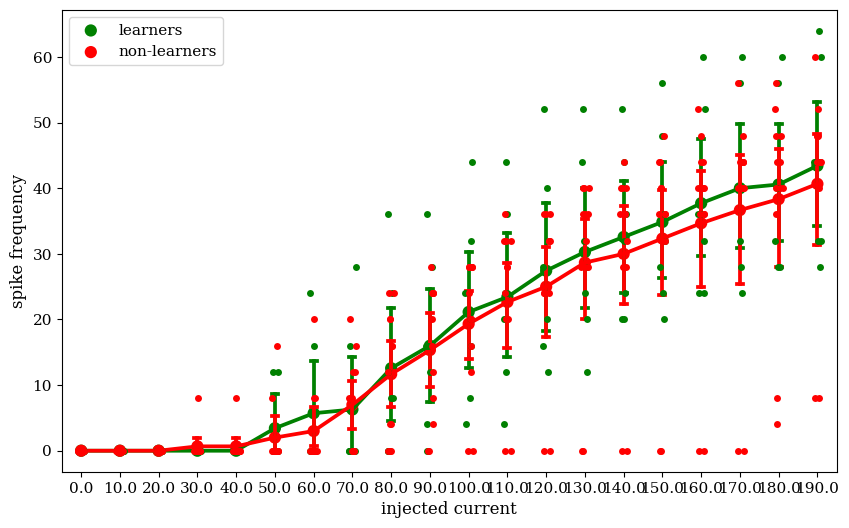

In [324]:
sns.stripplot(data=firing_properties[firing_properties["cell_ID"].isin(learners)],x="injected_current",y="spike_frequency",color="green")
sns.pointplot(data=firing_properties[firing_properties["cell_ID"].isin(learners)],x="injected_current",y="spike_frequency",color="green", capsize=0.15,label="learners")
sns.stripplot(data=firing_properties[firing_properties["cell_ID"].isin(non_learners)],x="injected_current",y="spike_frequency",color="red")
sns.pointplot(data=firing_properties[firing_properties["cell_ID"].isin(non_learners)],x="injected_current",y="spike_frequency",color="red",capsize=0.15, label="non-learners")
plt.ylabel("spike frequency")
plt.xlabel("injected current")
plt.legend()

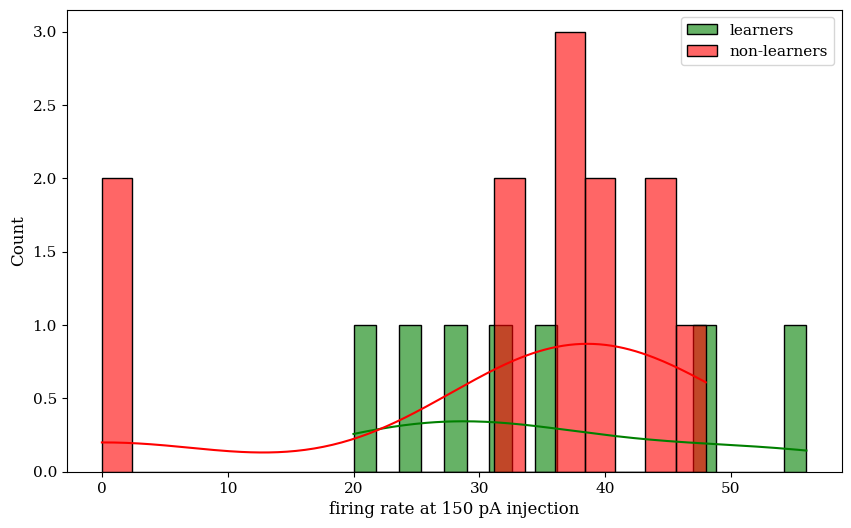

In [305]:
sns.histplot(data= firing_properties[(firing_properties["cell_ID"].isin(learners))&(firing_properties["injected_current"]==150)], x="spike_frequency", bins=20, kde=True, color="green", edgecolor='black',alpha=0.6,label="learners")
sns.histplot(data= firing_properties[(firing_properties["cell_ID"].isin(non_learners))&(firing_properties["injected_current"]==150)], x="spike_frequency", bins=20, kde=True, color="red", edgecolor='black',alpha=0.6,label="non-learners")
plt.xlabel("firing rate at 150 pA injection")
plt.legend()

In [256]:
firing_properties["cell_ID"]

0     2022_12_12_cell_2
1     2022_12_12_cell_5
2     2022_12_19_cell_2
3     2022_12_19_cell_3
4     2022_12_21_cell_1
5     2022_12_29_cell_1
6     2022_12_30_cell_1
7     2023_01_09_cell_1
8     2023_01_09_cell_2
9     2023_01_09_cell_3
10    2023_01_10_cell_1
11    2023_01_10_cell_2
12    2023_01_10_cell_3
13    2023_01_27_cell_1
14    2023_01_27_cell_2
15    2023_02_23_cell_1
16    2023_02_24_cell_1
17    2023_02_24_cell_2
18    2023_02_24_cell_3
19    2023_02_26_cell_1
20    2023_02_27_cell_1
21    2023_02_27_cell_2
22    2023_02_28_cell_1
23    2023_03_17_cell_1
24    2023_03_17_cell_2
25    2023_03_18_cell_1
26    2023_03_18_cell_2
27    2023_03_20_cell_1
28    2023_03_20_cell_2
29    2023_03_20_cell_3
30    2023_03_22_cell_1
31    2023_03_22_cell_2
Name: cell_ID, dtype: object